# **Unsupervised Learning Practice Project: Fantasy Sports Clustering Analysis**

--------------------------------
## **Context** 
-------------------------------

Fantasy sports are online gaming platforms where participants draft and manage virtual teams of real professional sports players. Based on the performance of the players in the real world, players are allotted points in the fantasy sports platform every match. The objective is to create the best possible team with a fixed budget to score maximum fantasy points, and users compete against each other over an entire sports league or season. Some of these fantasy sports require actual financial investments for participation, with the chances of winning monetary rewards as well as free matchday tickets on a periodic basis.

The fantasy sports market has seen tremendous growth over the past few years, with a valuation of \\$18.6 billion in 2019. The football (soccer) segment led in terms of market share in 2019, with over 8 million participants worldwide, and is expected to retain its dominance over the next couple of years. Digitalization is one of the primary factors driving the growth of the fantasy sports market as it allows participants the opportunity to compete on a global level and test their skills. With an increase in smartphone usage and availability of fantasy sports apps, this market is expected to witness a globe surge and reach a \\$48.6 billion valuation by 2027.


----------------------------
## **Objective**
-----------------------------

OnSports is a fantasy sports platform that has fantasy leagues for many different sports and has witnessed an increasing number of participants globally over the past 5 years. For each player, a price is set at the start, and the price keeps changing over time based on the performance of the players in the real world. With the new English Premier League season about to start, they have collected data from the past season and want to analyze it to determine the price of each player for the start of the new season. OnSports have hired you as a data scientist and asked you to conduct a cluster analysis to identify players of different potentials of each player based on previous season performance. This will help them understand the patterns in player performances and fantasy returns and decide the exact price to be set for each player for the upcoming football season.

--------------------------
## **Data Description**
--------------------------

- **Player_Name:** Name of the player.
- **Club:** Club in which the player plays.
- **Position:** Position in which the player plays.
- **Goals_Scored:** Number of goals scored by the player in the previous season.
- **Assists:** Number of passes made by the player leading to goals in the previous season.
- **Total_Points:** Total number of fantasy points scored by the player in the previous season.
- **Minutes:** Number of minutes played by the player in the previous season.
- **Goals_Conceded:** Number of goals conceded by the player in the previous season.
- **Creativity:** A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players.
- **Influence:** A score, computed using a range of stats, that evaluates a player's impact on a match, taking into account actions that could directly or indirectly affect the match outcome.
- **Threat:** A score, computed using a range of stats, that gauges players who are most likely to score goals.
- **Bonus:** Total bonus points received. The three best performing players in each match receive additional bonus points based on a score computed using a range of stats. 3 points are awarded to the highest scoring player, 2 to the second best, and 1 to the third.
- **Clean_Sheets:** Number of matches without conceding a goal in the previous season.

---------------------------------
##### **Student Name:** Nicolle Chuquilin Mori
---------------------------------

### **Importing the necessary libraries and overview of the dataset**

In [2]:
!pip install scikit-learn-extra

In [3]:
# Libraries to help me with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help me with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist, pdist

# To perform K-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import DBSCAN and Gaussian Mixture
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To import PCA
from sklearn.decomposition import PCA

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

### **Importing the Dataset**

In [4]:
flp = pd.read_csv("fpl_data.csv")

In [5]:
# Copying data to another variable to avoid any changes to original data
df = flp.copy()

In [6]:
df.shape

(476, 13)

### **Viewing samples of the data**

In [7]:
df.sample(n = 10, random_state = 1) 

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
441,Mark Noble,West Ham United,Midfielder,0,0,27,701,15,88.6,80.4,7,0,0
363,Sean Longstaff,Newcastle United,Midfielder,0,1,41,1405,26,182.8,179.2,148,1,2
31,Anwar El Ghazi,Aston Villa,Midfielder,10,0,111,1604,22,426.1,500.4,726,13,5
132,Olivier Giroud,Chelsea,Forward,4,0,47,740,5,112.0,161.4,403,6,4
90,Chris Wood,Burnley,Forward,12,3,138,2741,43,323.2,595.8,1129,16,9
249,Vontae Daley-Campbell,Leicester City,Defender,0,0,0,0,0,0.0,0.0,0,0,0
65,Danny Welbeck,Brighton and Hove Albion,Forward,6,4,89,1541,18,269.7,319.8,595,15,6
445,Ryan Fredericks,West Ham United,Defender,1,1,28,564,9,166.8,155.2,96,0,1
117,Christian Pulisic,Chelsea,Midfielder,4,3,82,1731,21,378.8,361.4,724,3,7
415,Ryan Sessegnon,Tottenham Hotspurs,Defender,0,0,0,0,0,0.0,0.0,0,0,0


**Observations:**

- The dataset includes players from different clubs.
- A notable presence of players is observed in the midfield position.
- Certain players recorded minimal or zero playing time during the previous season, resulting in correspondingly low or zero fantasy point scores.

### **Checking the data types of the columns for the dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


**Observations:**

* Player_Name, Club and Position are categorized as object type.
* The remaining columns are classified as numeric.
* Each of the columns comprises a total of **476 non-null observations**, indicating the absence of any missing values within the dataset

In [9]:
# Checking for duplicate values
df.duplicated().sum()

0

In [10]:
# Checking for missing values in the data
df.isnull().sum()

Player_Name       0
Club              0
Position          0
Goals_Scored      0
Assists           0
Total_Points      0
Minutes           0
Goals_Conceded    0
Creativity        0
Influence         0
Threat            0
Bonus             0
Clean_Sheets      0
dtype: int64

**Observations:**

- No missing values - as stated above
- No duplicated rows 

## **Exploratory Data Analysis**

**Let's check the statistical summary of the data**

In [11]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Player_Name,476,476,Alex Runnarsson,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Club,476,17,Arsenal,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,476,4,Midfielder,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goals_Scored,476.0,NaN,NaN,NaN,1.907563,3.455562,0.0,0.0,0.5,2.0,23.0
Assists,476.0,NaN,NaN,NaN,1.752101,2.708563,0.0,0.0,0.0,2.0,14.0
Total_Points,476.0,NaN,NaN,NaN,58.516807,51.293559,0.0,10.0,48.0,94.25,244.0
Minutes,476.0,NaN,NaN,NaN,1336.909664,1073.773995,0.0,268.75,1269.5,2256.25,3420.0
Goals_Conceded,476.0,NaN,NaN,NaN,19.157563,15.946171,0.0,4.0,18.0,31.0,68.0
Creativity,476.0,NaN,NaN,NaN,195.97605,251.478541,0.0,8.3,96.95,296.95,1414.9
Influence,476.0,NaN,NaN,NaN,294.617647,267.779681,0.0,46.5,233.1,499.5,1318.2


**Observations:**

- The dataset contains 16 distinct Clubs, with the most frequent Club being Arsenal (30 occurrences).
- There are a total of 4 unique Position represented in the dataset. Most of them play in Mildfield
- Total Points ranged from 0 to 244, with an average of 59 points scored
- The average number of minutes played is approximately 1337, while the median is 1270. This indicates a slight rightward skew in the distribution of Minutes Played
- Over half of the players in the dataset have achieved either one goal or no goals.
- Half of the players in the dataset have not contributed any assists to goals.

### **Univariate Analysis**

#### **Numeric Variables**

In [12]:
# Function to plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  
        sharex = True, 
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    ) 

**`Goals_Scored`**

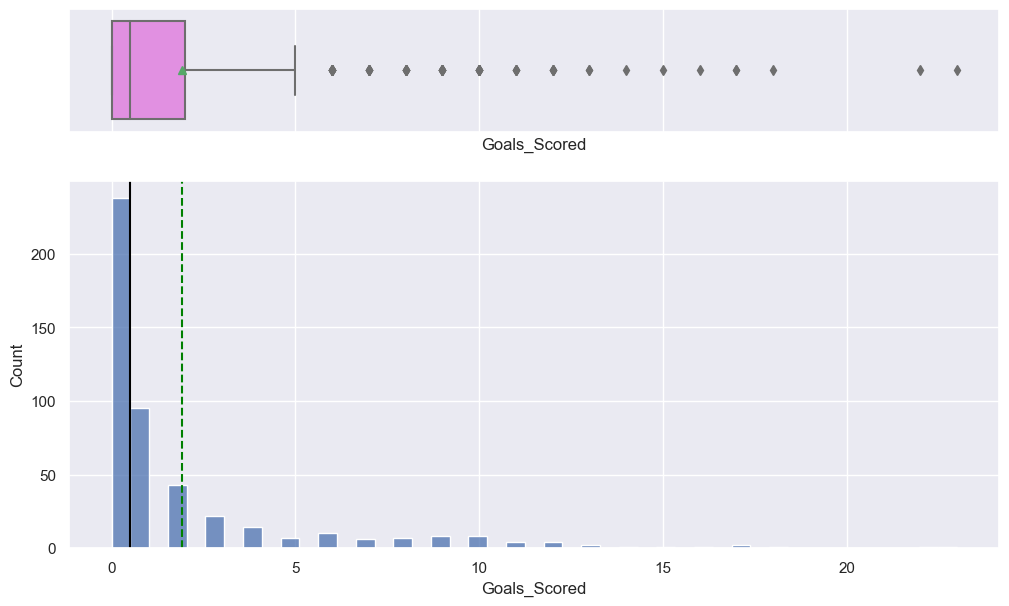

In [13]:
histogram_boxplot(df, 'Goals_Scored')

**Observation**
- The distribution is right-skewed
- Most players score 2 goals or less
- Very few players have scored more than 15 goal

**`Assists`**

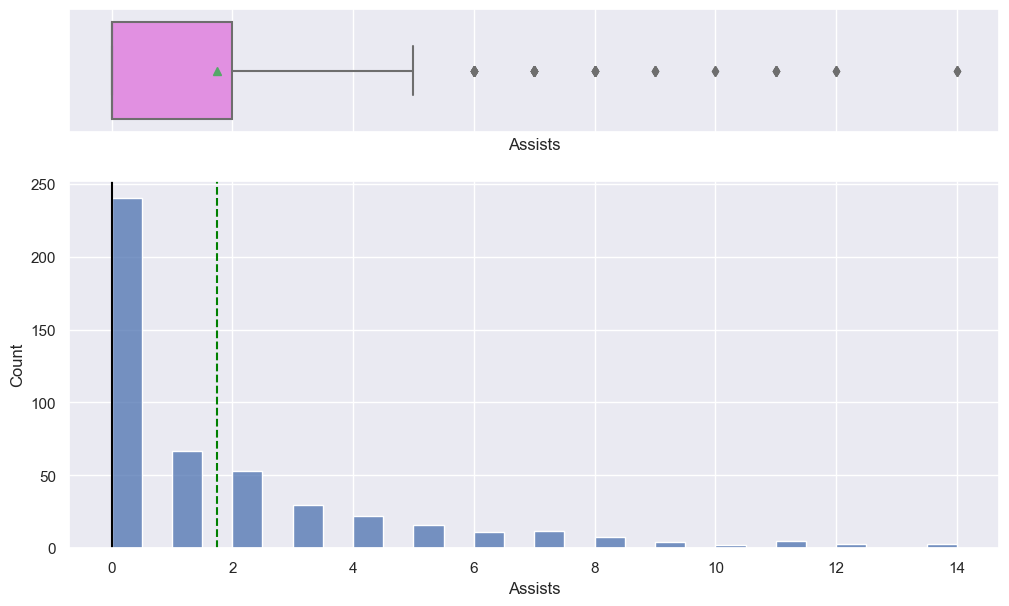

In [14]:
histogram_boxplot(df, 'Assists')  

**Observation**
- The distribution is right-skewed
- Most players have 2 assists or less
- Very few players have assisted more than 8 times

**`Goals Conceded`**

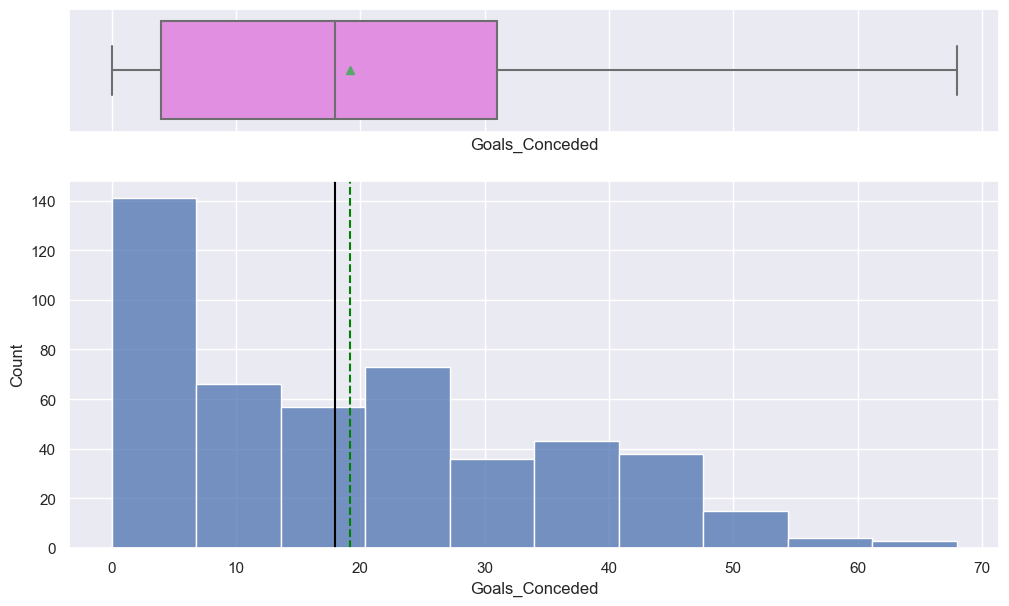

In [15]:
histogram_boxplot(df, 'Goals_Conceded') 

**Observation**
- The distribution is slighly right-skewed
- Most players (75%) conceded 30 goals or less
- Very few players have conceded more than 60 goals

**`Clean Sheets`**

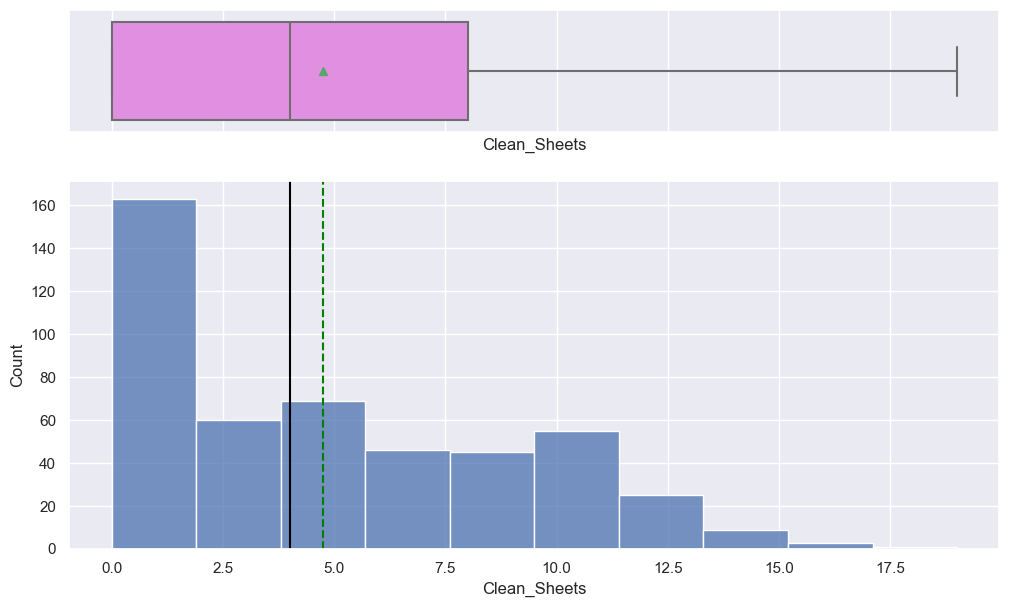

In [16]:
histogram_boxplot(df, 'Clean_Sheets')  

**Observation**
- The distribution is slighly right-skewed
- A significant number of players did not kept clean sheet
- On average players kept 5 clean sheets

**`Minutes`**

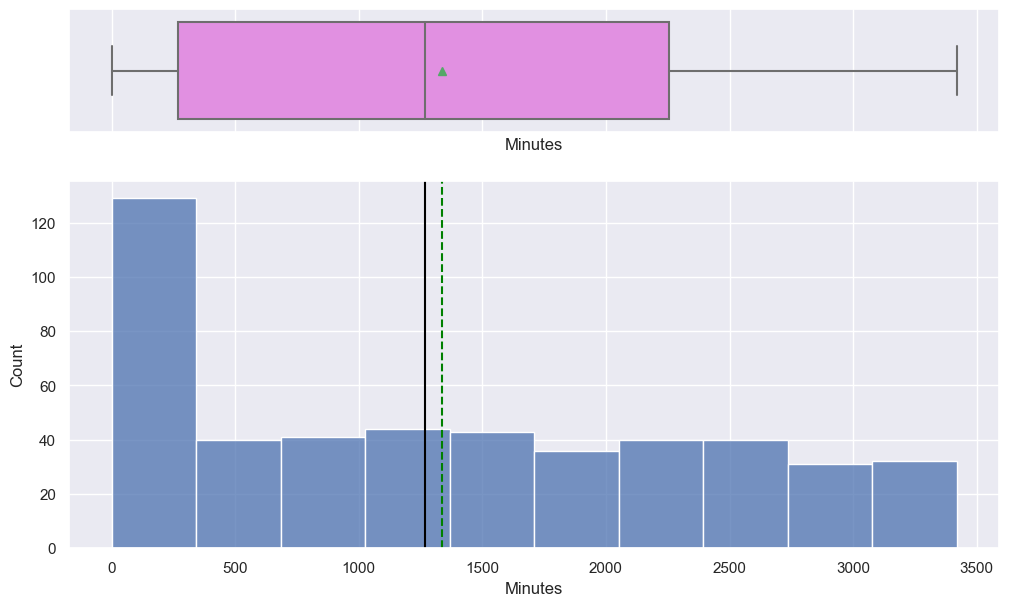

In [17]:
histogram_boxplot(df, 'Minutes')   

**Observation**
- The distribution appears to be relatively uniform, with around 50% of the players having played approximately 1250 minutes or more.
- A significant number of players did not participate in any football matches during the season.

**`Total Points`**

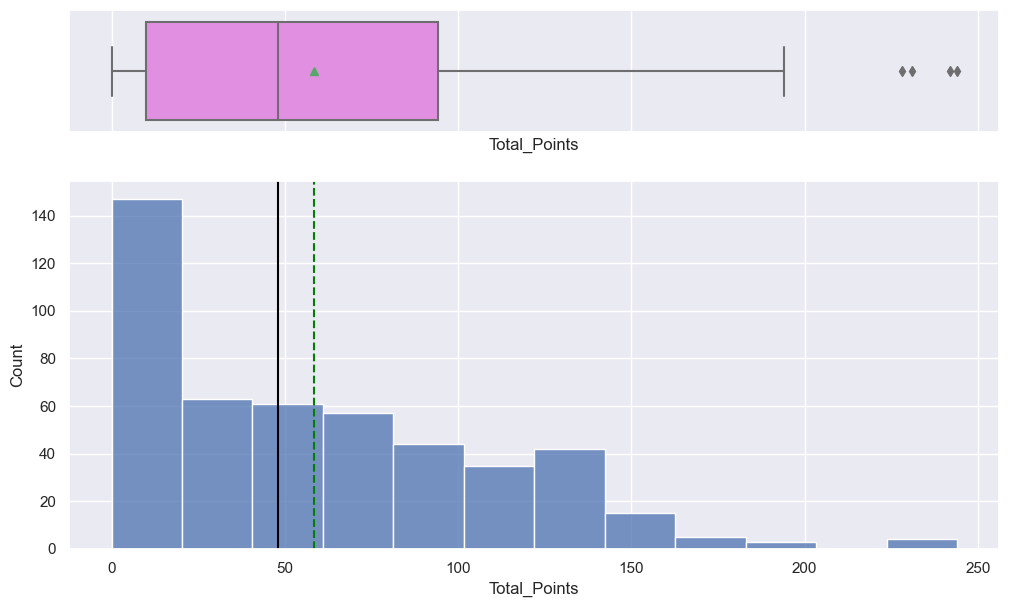

In [18]:
histogram_boxplot(df, 'Total_Points') 

**Observation**
- The distribution is right-skewed
- More than 50% of the players have scored more than 50 fantasy points.
- Several players scored no points last season.
- Very few players have gotten more than 200 points

**`Creativity`**

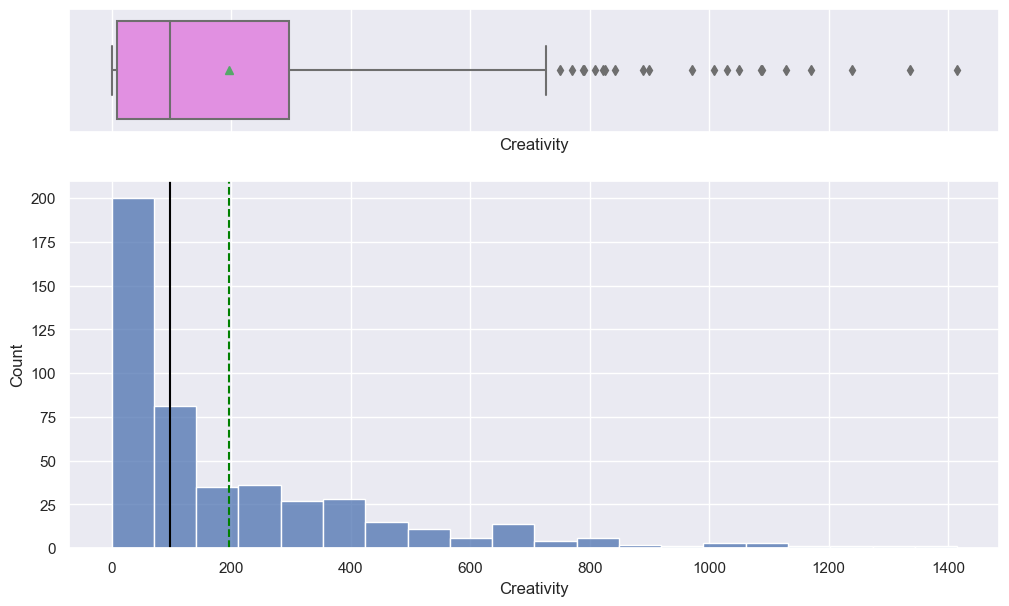

In [19]:
histogram_boxplot(df, 'Creativity')    

**Observation**
- The distribution is right-skewed
- Very few players have gotten more than 500 creativity score

**`Influence`**

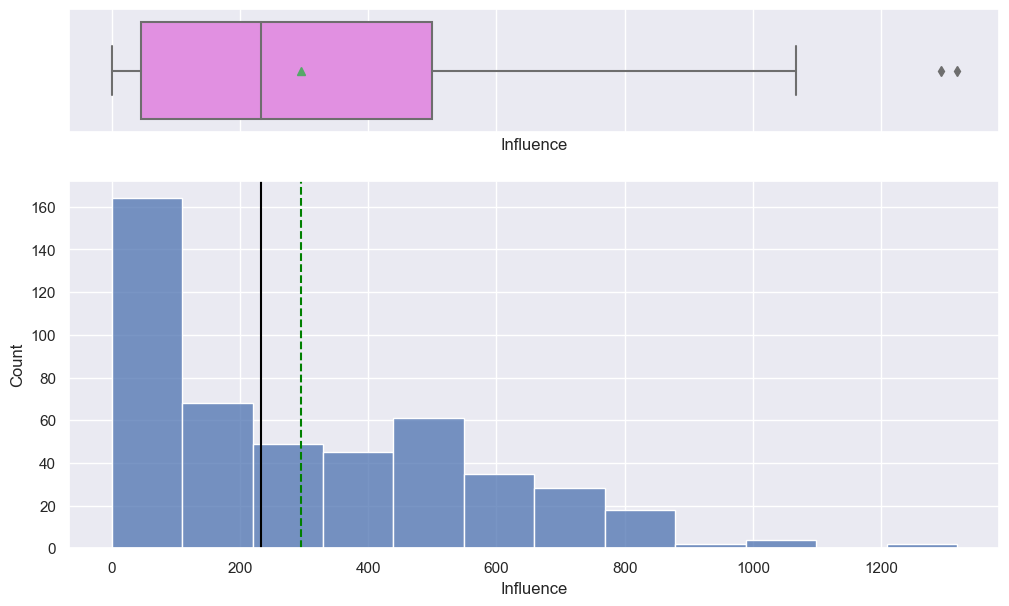

In [20]:
histogram_boxplot(df, 'Influence')

**Observation**
- The distribution is right-skewed
- Very few players have gotten more than 800 influence score

**`Threat`**

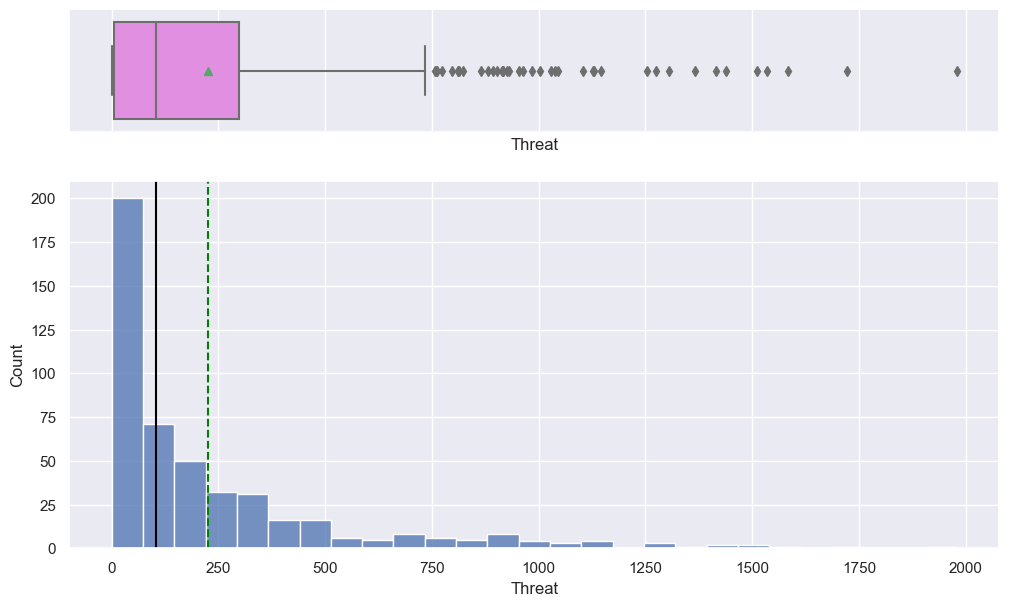

In [21]:
histogram_boxplot(df, 'Threat')  

**Observation**
- The distribution is right-skewed
- Very few players have gotten more than 500 threat score

**`Bonus`**

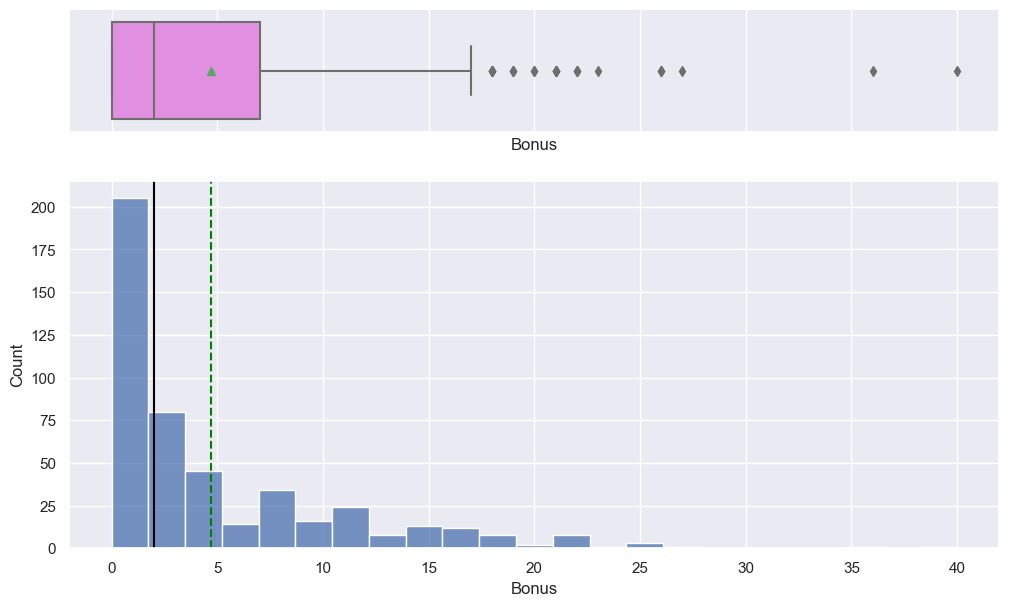

In [22]:
histogram_boxplot(df, 'Bonus')  

**Observation**
- The distribution is right-skewed
- Very few players have gotten more than 20 Bonus points

#### **Categorical Variables**

In [23]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature]) 
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show() 

**`Club`**

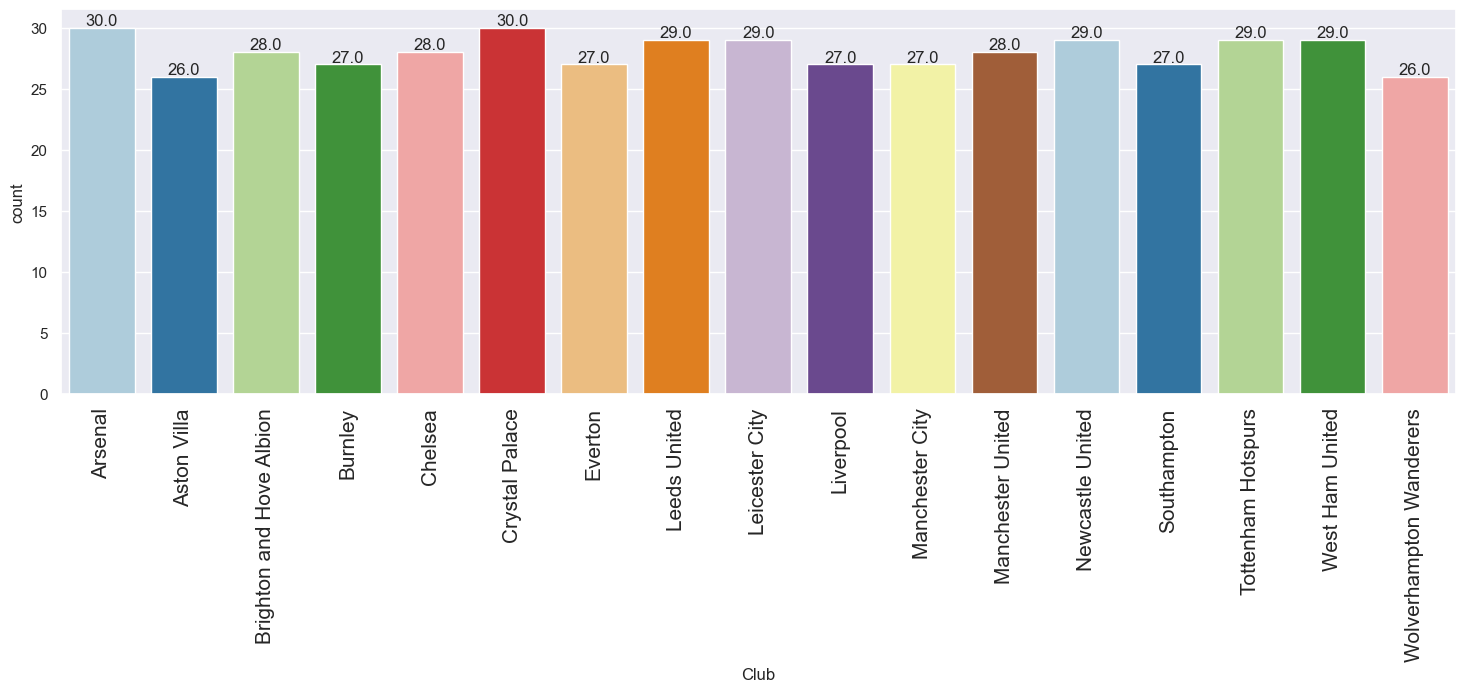

In [24]:
labeled_barplot(df, 'Club')

**Observation**
- The dataset has a uniform number of players per club
- All the clubs have a minimun of 26 players.

**`Position`**

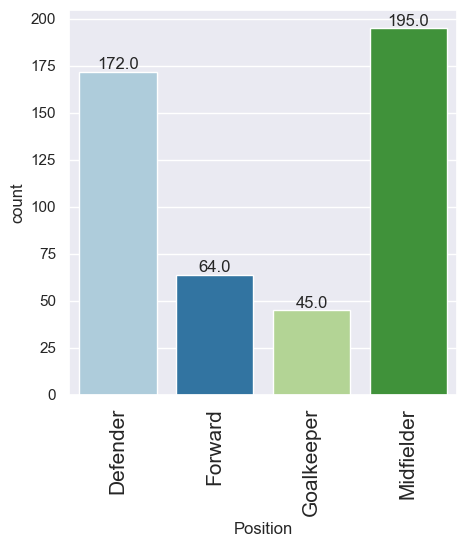

In [25]:
labeled_barplot(df, 'Position') 

**Observation**
- As seen earlier, Midlfield position is the most frequent, followed closely by Defender (195 and 172 count respectively) 
- Foward and Goalkeeper have the lowest amount of players. This is logical since teams typically require fewer goalkeepers, and the prevailing team formations nowadays often feature only one or two forwards.

### **Bivariate Analysis**

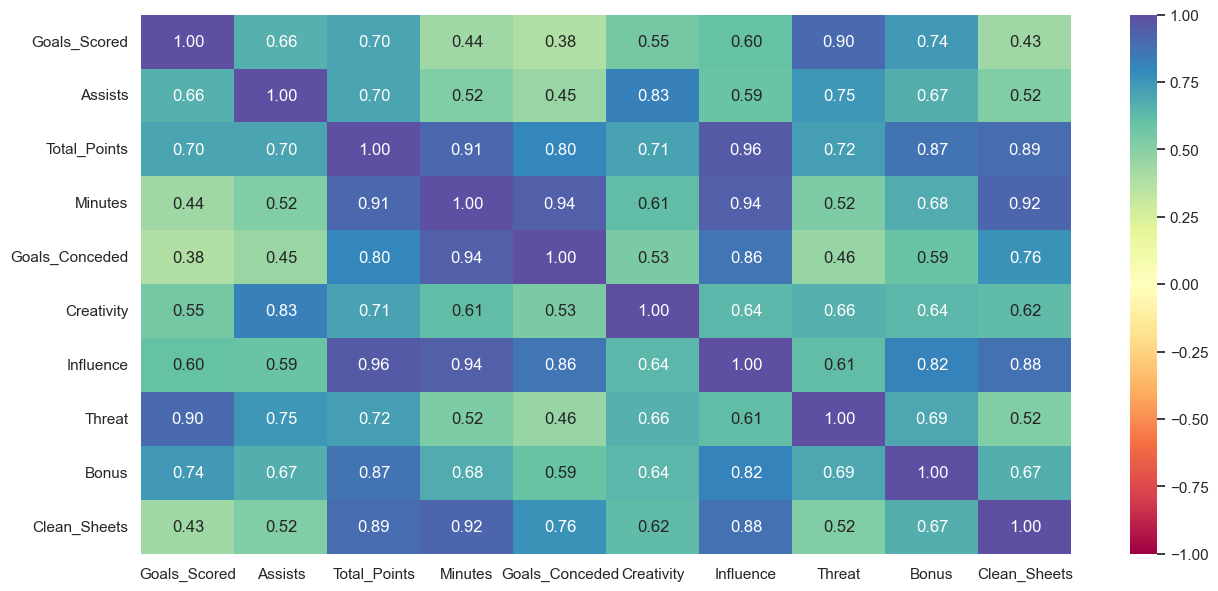

In [26]:
# Correlation check
cols_list = df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 7))

sns.heatmap(
    df[cols_list].corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)

plt.show()

**Observations:**

- Numerous variables exhibit significant correlations among themselves.

- Being the strongest ones:

     - the correlation between a player's goal count and their threat score which makes sense as the threat score measures a player's capability to score goals.

     - the influence score with total fantasy points and the player's minutes in the game. This is reasonable since these players exert a substantial impact on the game's result, leading them to participate extensively in each match and amass higher fantasy point totals.

**Let's check players from which team have scored the most fantasy points on average.**

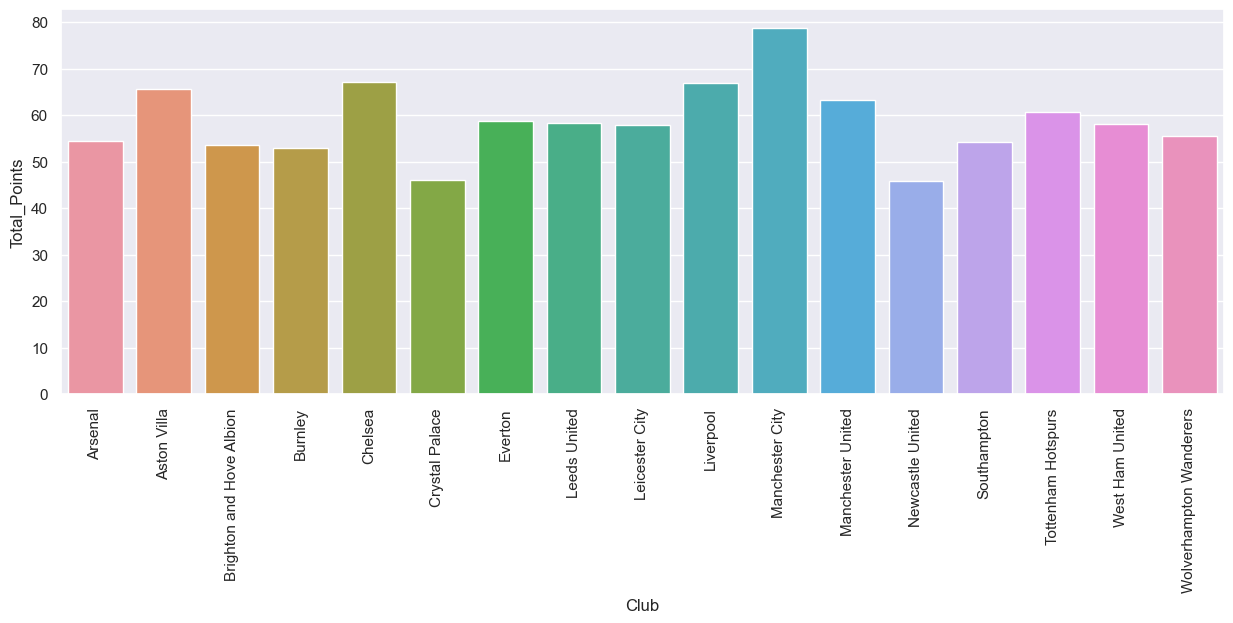

In [27]:
plt.figure(figsize = (15,5))

sns.barplot(data = df, x = 'Club', y = 'Total_Points', errorbar=('ci', False))

plt.xticks(rotation = 90)

plt.show()

**Observation**
- The most fantasy points are scored by Manchester City players, therefore it looks favorable to keep them in a fantasy team.

**We know that players in different positions have specific roles to play in a team. Let's check players in which positions tend to score more fantasy points on average.**

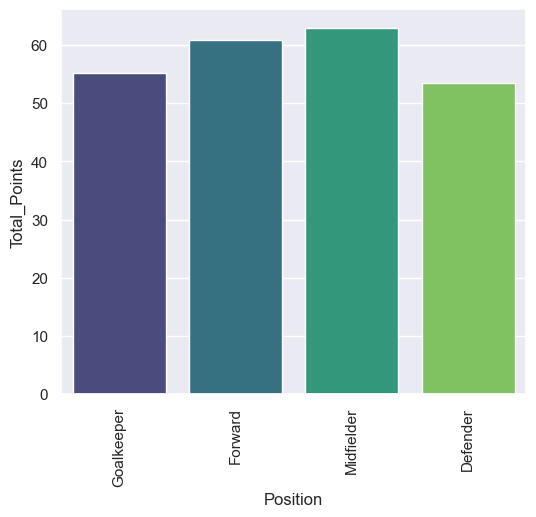

In [28]:
plt.figure(figsize = (6, 5))
sns.barplot(data = df, x = 'Position', y = 'Total_Points', errorbar=('ci', False), palette='viridis')
plt.xticks(rotation = 90)
plt.show()

**Observation**
- On average Midfielders tend to score the most points

**To effectively utilize their squad depth, managers often rotate the squad to keep key players in shape for tougher games. Let's check the total number of minutes played, on average, across different positions.**

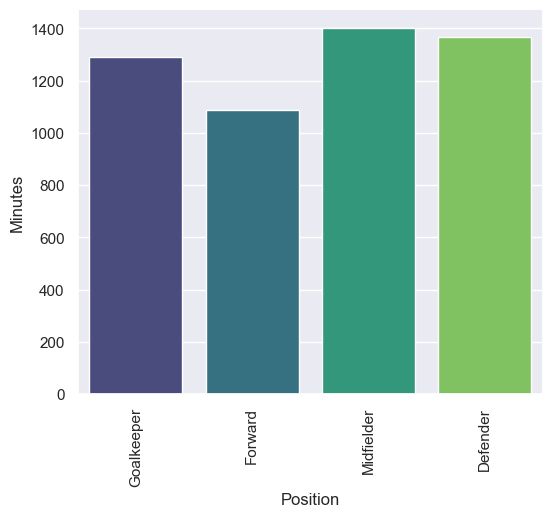

In [29]:
plt.figure(figsize = (6, 5))
sns.barplot(data = df, x = 'Position', y = 'Minutes' , errorbar=('ci', False), palette='viridis')
plt.xticks(rotation = 90)
plt.show()

**Observation**
- On average the total number of minutes played ranged from 1000 to 1400, being the milfieders and defenderers who tend to play more minutes

**Every point counts in fantasy sports and getting bonus points for a player is always a treat. Let's check which team's players have secured the most bonus points, on average, last season.**

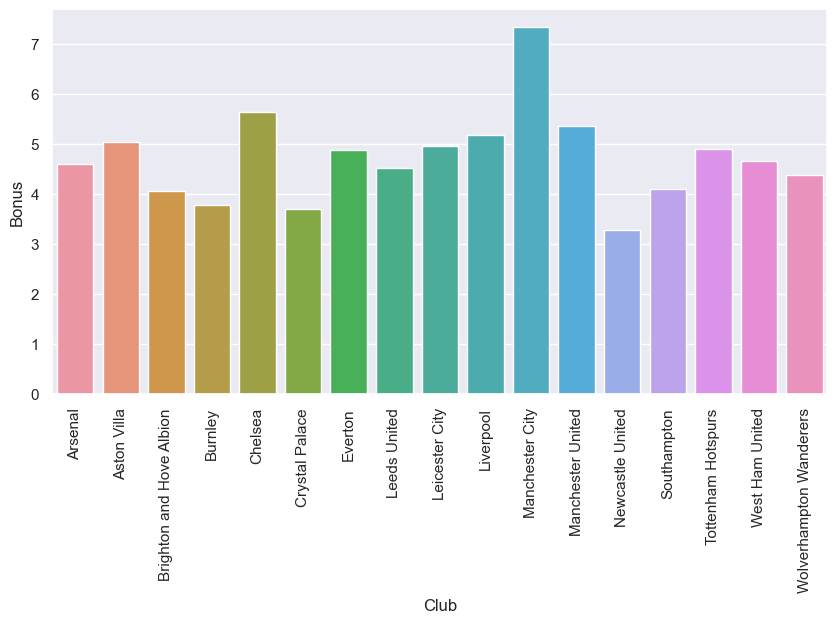

In [30]:
plt.figure(figsize = (10, 5))
sns.barplot(data = df, x = 'Club', y = 'Bonus' , errorbar=('ci', False))
plt.xticks(rotation = 90)
plt.show()

**Observation**
- Manchester City presents the highest fantasy bonus points again.

**Let's see which players scored the most fantasy points last season for different positions of play.**

In [31]:
pos_list = df.Position.unique().tolist()
best_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df[df.Position == pos]
    best_df = pd.concat([best_df, df_aux[df_aux.Total_Points == df_aux.Total_Points.max()][['Player_Name', 'Club', 'Position', 'Total_Points']]])

best_df

,Player_Name,Club,Position,Total_Points
36,Emiliano Martinez,Aston Villa,Goalkeeper,186
403,Harry Kane,Tottenham Hotspurs,Forward,242
315,Bruno Fernandes,Manchester United,Midfielder,244
223,Stuart Dallas,Leeds United,Defender,171


**Observation**
- Surprisingly, none of them are from Manchester City

**Let's see the top 10 players with the most fantasy points last season for different positions of play.**

In [32]:
best10_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df[df.Position == pos]
    best10_df = pd.concat([best10_df, df_aux.sort_values('Total_Points', ascending=False).reset_index(drop=True).loc[:10, ['Player_Name', 'Club', 'Position', 'Total_Points']]])

best10_df

,Player_Name,Club,Position,Total_Points
0,Emiliano Martinez,Aston Villa,Goalkeeper,186
1,Ederson Moares,Manchester City,Goalkeeper,160
2,Illan Meslier,Leeds United,Goalkeeper,154
3,Hugo Lloris,Tottenham Hotspurs,Goalkeeper,149
4,Nick Pope,Burnley,Goalkeeper,144
5,Alisson Becker,Liverpool,Goalkeeper,140
6,Edouard Mendy,Chelsea,Goalkeeper,140
7,Lukasz Fabianski,West Ham United,Goalkeeper,133
8,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,132
9,Bernd Leno,Arsenal,Goalkeeper,131


**Observation**
- The most frequent top 10 players per position are from Manchester City and Liverpool

### **Outlier Check**

- Let's plot the boxplots of all numerical columns to check for outliers.

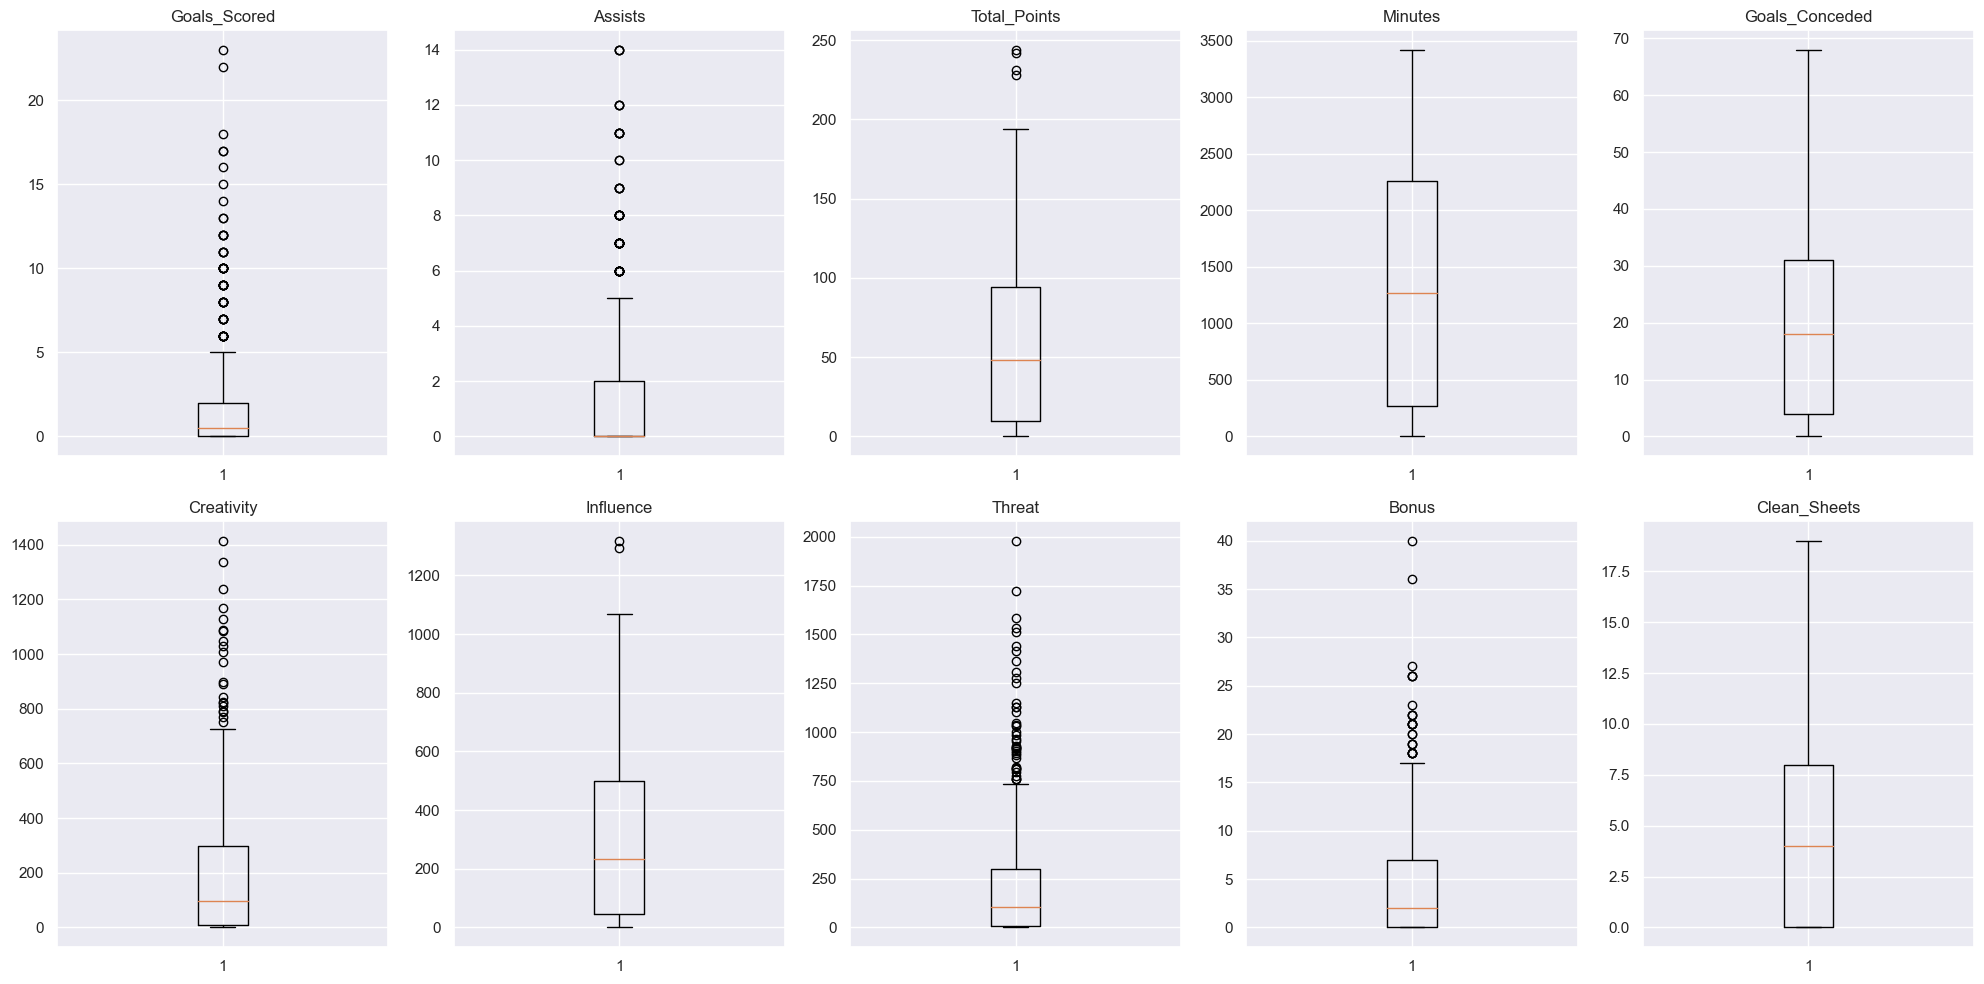

In [33]:
plt.figure(figsize = (20, 10))

numeric_columns = df.select_dtypes(include = np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    
    plt.subplot(2, 5, i + 1)
    
    plt.boxplot(df[variable], whis = 1.5)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

**Observation**
- Goals_Scorred, Asssts, Creativity, Threat and Bonus present several outliers
- However, they should not be treated as they are proper data

### **Scaling**

- Let's scale the data before we proceed with clustering.

In [34]:
# Scaling the data before clustering
scaler = StandardScaler() 
subset = df.iloc[:, 3:]
subset_scaled = scaler.fit_transform(subset)

In [35]:
# Creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns = subset.columns)

### **Applying PCA**


In [36]:
from sklearn.decomposition import PCA

In [37]:
# Defining the number of principal components to generate
n = subset.shape[1]                                    
pca = PCA(n_components = n, random_state = 1)                                   
data_pca = pd.DataFrame(pca.fit_transform(subset_scaled_df ))            

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_   
exp_var                  

array([0.72148934, 0.13659346, 0.05880028, 0.03138379, 0.02274545,
       0.01522727, 0.00700781, 0.00393725, 0.00194529, 0.00087005])

## **K-Means Clustering**

In [38]:
k_means_df = data_pca.copy()

#### Elbow Method

Number of Clusters: 1 	Average Distortion: 2.7730371100978024
Number of Clusters: 2 	Average Distortion: 1.863573678589826
Number of Clusters: 3 	Average Distortion: 1.5612774038101593
Number of Clusters: 4 	Average Distortion: 1.3545171820838149
Number of Clusters: 5 	Average Distortion: 1.2931541699741684
Number of Clusters: 6 	Average Distortion: 1.234123145342007
Number of Clusters: 7 	Average Distortion: 1.145793403563414
Number of Clusters: 8 	Average Distortion: 1.115307656889078
Number of Clusters: 9 	Average Distortion: 1.079731047577605
Number of Clusters: 10 	Average Distortion: 1.0174369926410627
Number of Clusters: 11 	Average Distortion: 0.9986112688354981
Number of Clusters: 12 	Average Distortion: 0.986283149479005
Number of Clusters: 13 	Average Distortion: 0.960276698577311
Number of Clusters: 14 	Average Distortion: 0.9501453167908891


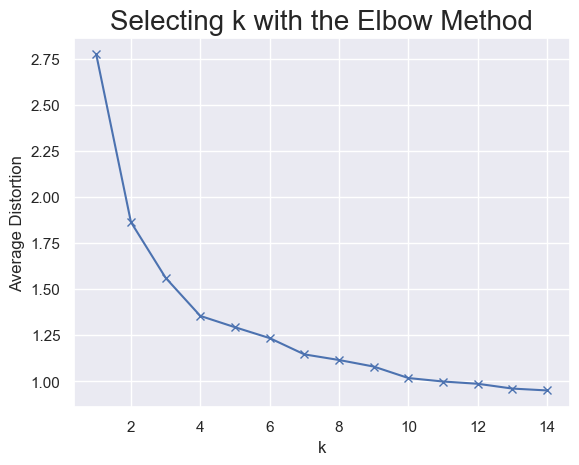

In [39]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    
    model = KMeans(n_clusters = k, random_state = 1, n_init = "auto")
    
    model.fit(data_pca)
    
    prediction = model.predict(k_means_df)
    
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis = 1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")

plt.xlabel("k")

plt.ylabel("Average Distortion")

plt.title("Selecting k with the Elbow Method", fontsize = 20)

plt.show()

**Observations:**

- Observing the elbow method, it appears that k could be either 4 or 5, considering that beyond these points, the graph demonstrates a nearly parallel movement with the X-axis.
- We will try with k = 4

In [40]:
kmeans = KMeans(n_clusters = 4, random_state = 1, n_init = "auto")

kmeans.fit(k_means_df)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [41]:
# Creating a copy of the original data
df1 = df.copy()

# Adding K-Means cluster labels to the K-Means dataframe
k_means_df["KM_segments"] = kmeans.labels_

# Adding K-Means cluster labels to the original dataframe
df1["KM_segments"] = kmeans.labels_

### **Cluster Profiling**

In [42]:
km_cluster_profile = df1.groupby("KM_segments" ).mean(numeric_only = True)  

In [43]:
# Creating the "count_in_each_segment" feature in K-Means cluster profile

km_cluster_profile["count_in_each_segment"] = (
    df1.groupby( "KM_segments" )["Total_Points"].count().values)  

In [44]:
#  Players in each cluster.
for cl in df1["KM_segments" ].unique(): 
    print("In cluster {}, the following players are present:".format(cl))
    print(df1[df1[ "KM_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 1, the following players are present:
['Alex Runnarsson' 'Cedric Soares' 'Edward Nketiah'
 'Gabriel Teodoro Martinelli Silva' 'Matt Macey' 'Miguel Azeez'
 'Pablo Mari' 'Reiss Nelson' 'Sead Kolasinac' 'Shkodran Mustafi'
 'Sokratis Papastathopoulos' 'William Saliba' 'Ahmed El Mohamady'
 'Carney Chukwuemeka' 'Conor Hourihane' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Keinan Davis'
 'Kortney Hause' 'Marvelous Nakamba' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Alireza Jahanbakhsh' 'Andi Zeqiri'
 'Bernardo Fernandes da Silva Junior' 'Davy Propper' 'Jakub Moder'
 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo' 'Percy Tau'
 'Reda Khadra' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Jimmy Dunne' 'Joel Mumbongo' 'Josh Benson' 'Kevin Long'
 'Lewis Richardson' 'Phil Bardsley' 'Will Norris' 'Billy Gilmour'
 'Emerson Palmieri dos Santos' 'Faustino Anjorin' 'Fikayo Tomori'
 'Karlo Ziger' 'Kepa Arrizabalaga' 'Valenti

In [45]:
df1.groupby(["KM_segments", "Position"])['Player_Name'].count().reset_index(name='Player_Count')

,KM_segments,Position,Player_Count
0,0,Defender,48
1,0,Goalkeeper,17
2,0,Midfielder,32
3,1,Defender,70
4,1,Forward,28
5,1,Goalkeeper,25
6,1,Midfielder,65
7,2,Defender,7
8,2,Forward,20
9,2,Midfielder,35


In [46]:
# Highlighting the maximum average value among all the clusters for each of the variables
km_cluster_profile.style.highlight_max(color = "lightgreen", axis = 0) 

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
KM_segments,,,,,,,,,,,
0,1.371134,1.783505,103.000000,2674.288660,37.649485,256.951546,579.144330,198.288660,7.463918,9.989691,97
1,0.148936,0.202128,9.824468,238.750000,3.930851,28.171809,43.164894,30.244681,0.409574,0.558511,188
2,8.919355,6.709677,141.725806,2458.306452,33.451613,625.253226,661.458065,860.677419,16.322581,9.322581,62
3,1.503876,1.604651,56.038760,1392.736434,20.573643,188.358915,270.818605,223.255814,3.356589,4.705426,129


**Let's plot the boxplot**

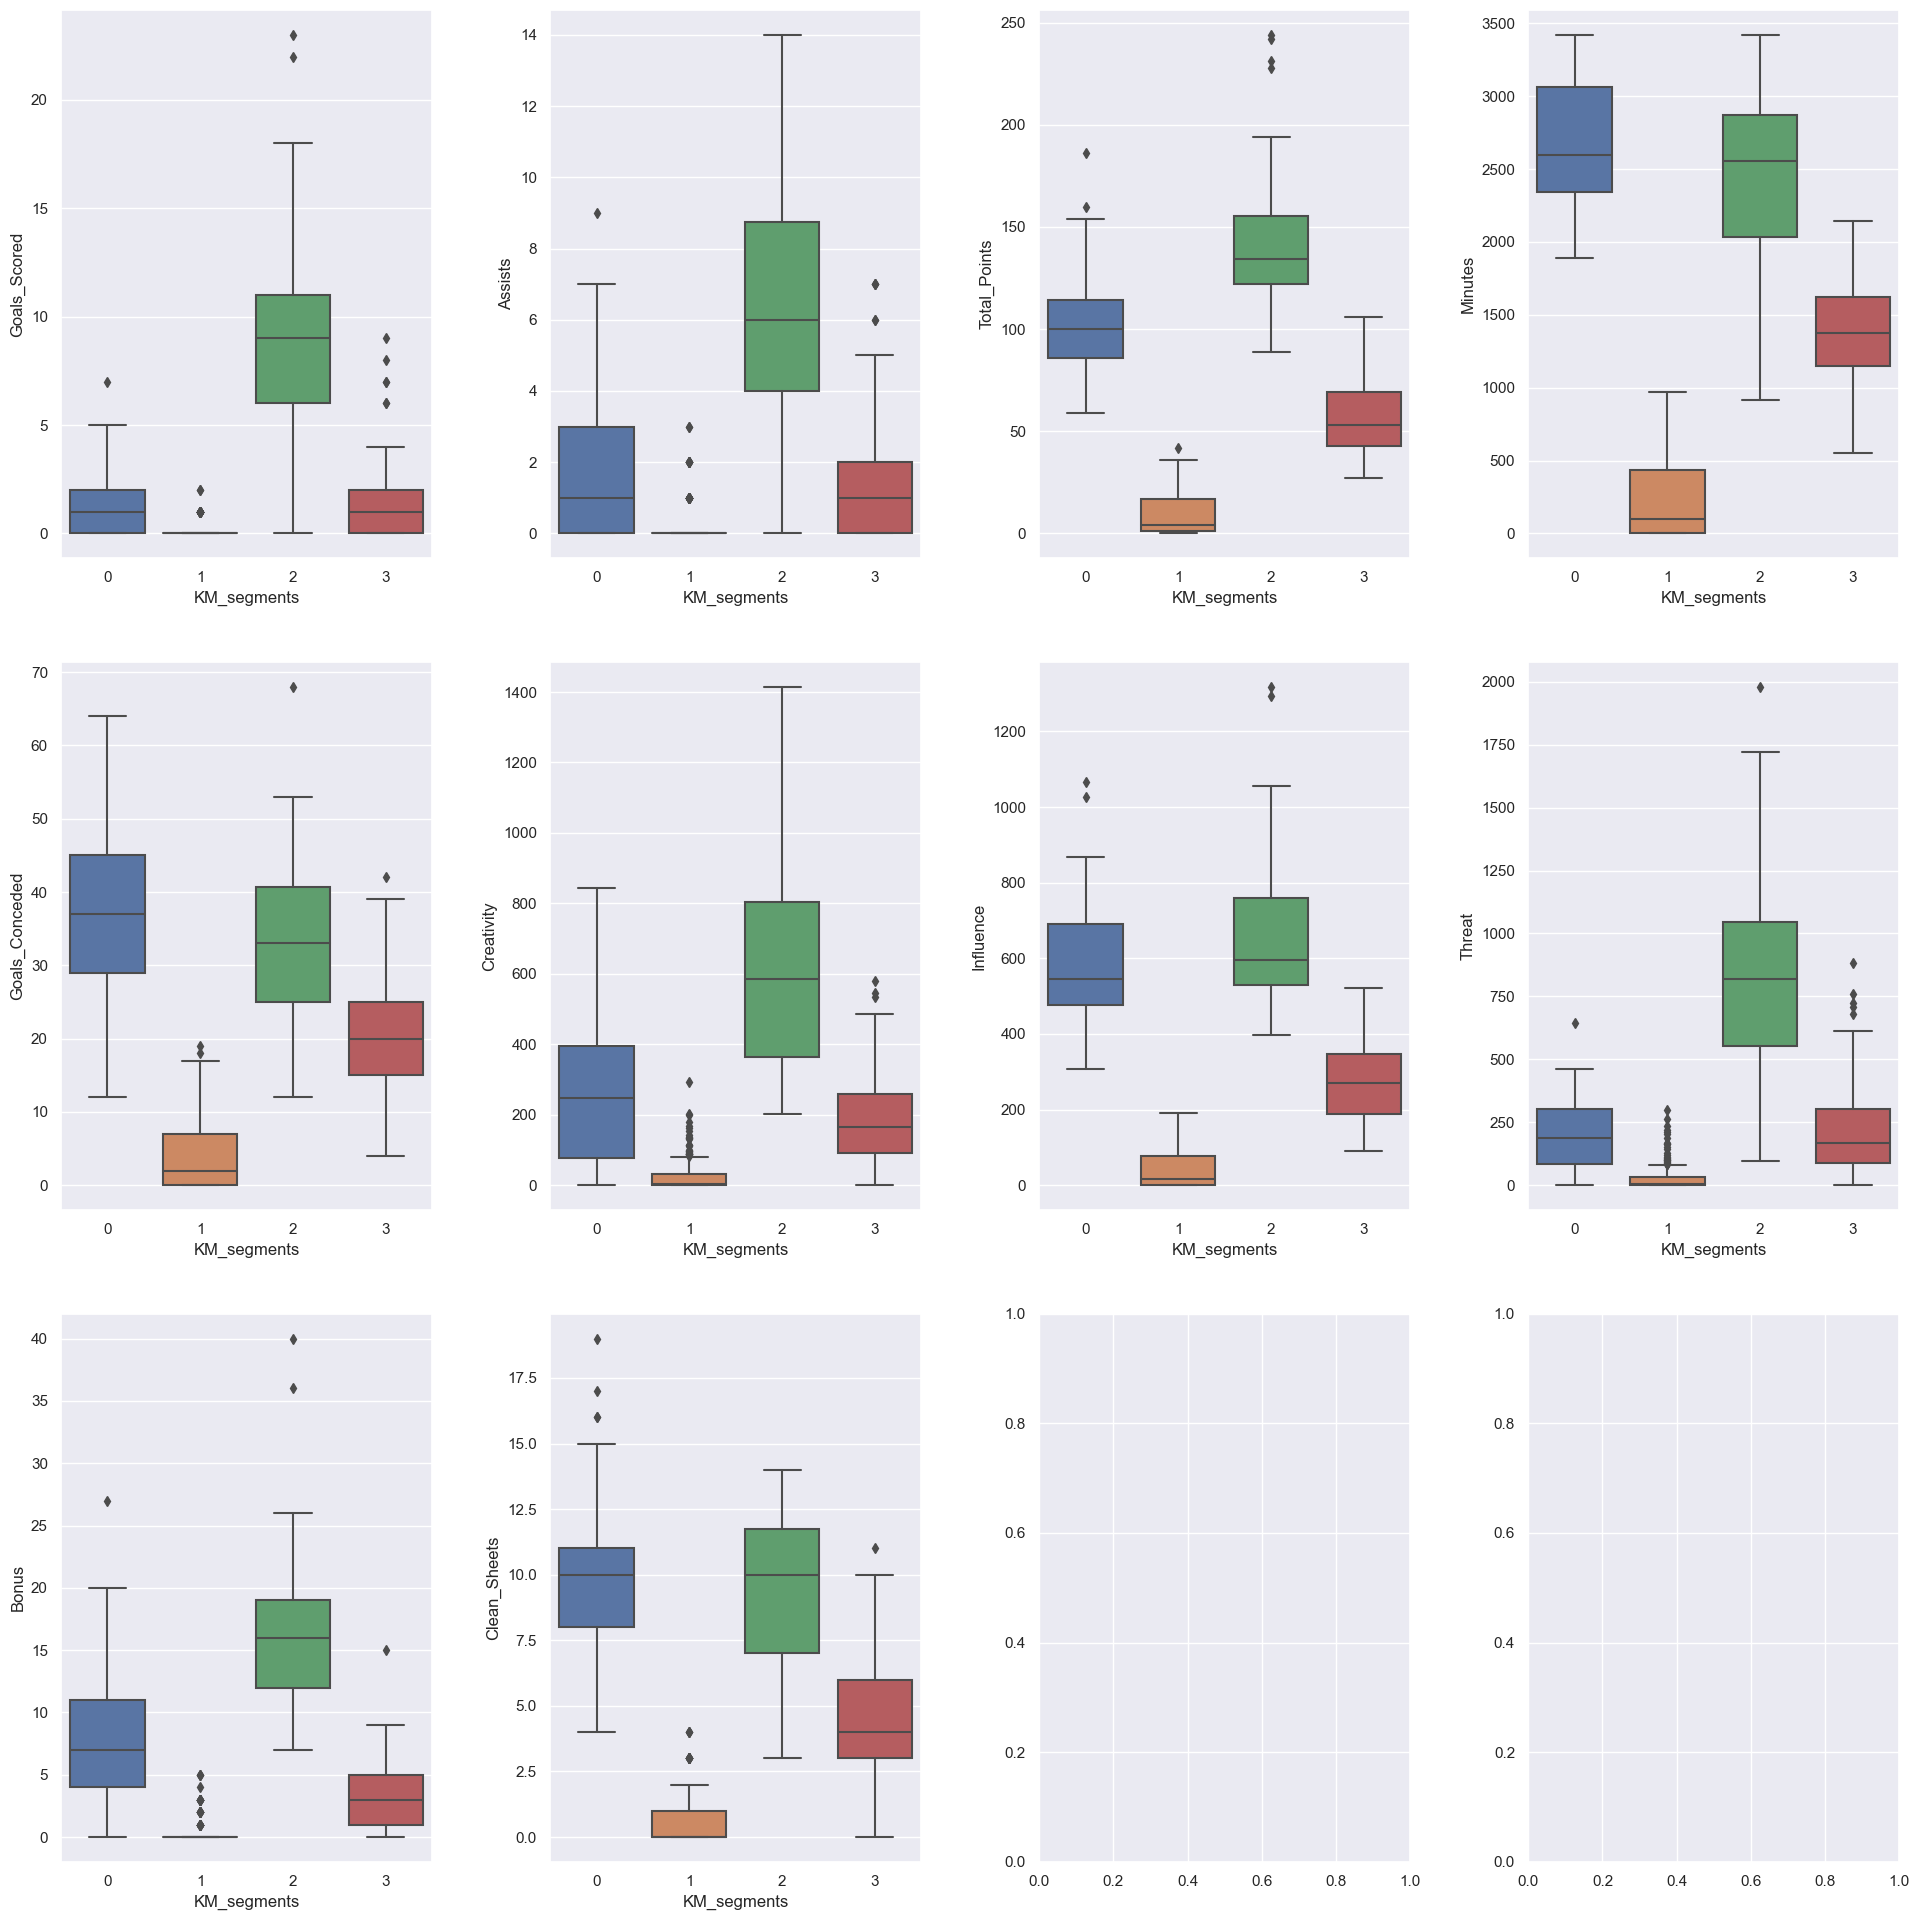

In [47]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df1,
                y = df1.columns[3 + counter],
                x = "KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Observations of each cluster:**

- **Cluster 0: ABOVE AVERAGE PLAYERS**
    - 97 players
    - No forwards (maybe more defensive team). 
    - Average goals scored (~1), Above Average assists (~1.8), Above average total fantasy points scored in the prior season 
    - High Creativity (~257), High minutes played (~2674), Above average influence score, and a Moderate threat score
    - Most of the players got Above Average Bonus points. 
- **Cluster 1: STRUGGLING PLAYERS**
    - 188 players
    - Lowest goals scored (~0.1), Lowest assists (~0.2), Lowest total fantasy points  
    - Lowest game time, creativity, influence, and threat scores.
    - Most of the players got no Bonus points <br>

- **Cluster 2: OUTSTANDING PLAYERS**
    - 62 players
    - No goalkeepers (maybe more  offensive team)
    - High goals scored (~9), High assists (~6.7), high total fantasy points
    - High game time, high creativity, influence, and threat score.
    - Most of the players got high bonus points. <br>

- **Cluster 3: AVERAGE PLAYERS**
    - 129 players 
    - Moderate goals scored (~1.5), Moderate assists (~1.6), Moderate total fantasy points
    - Moderate game time, a low creativity score, a low influence score, and a Moderate threat score.
    - Most of the players got low bonus points. <br>

## **K-Medoids Clustering**

In [48]:
k_med_df = data_pca.copy() 

In [52]:
kmed = KMedoids(n_clusters = 4, random_state = 1) 
kmed.fit(k_med_df)

KMedoids(n_clusters=4, random_state=1)

In [53]:
df2 = df.copy()

k_med_df["KMed_segments"] =  kmed.labels_ # Adding K-Medoids cluster labels to K-Medoids data

df2["KMed_segments"] =  kmed.labels_ # Adding K-Medoids cluster labels to the whole data

### **Cluster Profiling**

In [54]:
kmed_cluster_profile = df2.groupby("KMed_segments").mean(numeric_only = True) #mean

In [55]:
# Adding the count
kmed_cluster_profile["count"] = (
    df2.groupby("KMed_segments")["Total_Points"].count().values
)

**Let's plot the boxplot**

In [56]:
# K-Medoids cluster profile
kmed_cluster_profile.style.highlight_max(color = "orange", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
KMed_segments,,,,,,,,,,,
0,7.512195,6.195122,133.243902,2452.243902,33.853659,602.902439,625.653659,745.402439,14.573171,9.231707,82
1,1.068966,1.091954,99.528736,2638.195402,36.632184,184.582759,575.818391,166.333333,6.988506,9.931034,87
2,1.338235,1.558824,51.073529,1270.051471,18.977941,180.458824,242.588235,203.102941,2.904412,4.205882,136
3,0.099415,0.111111,7.736842,193.187135,3.362573,18.979532,34.188304,22.608187,0.280702,0.385965,171


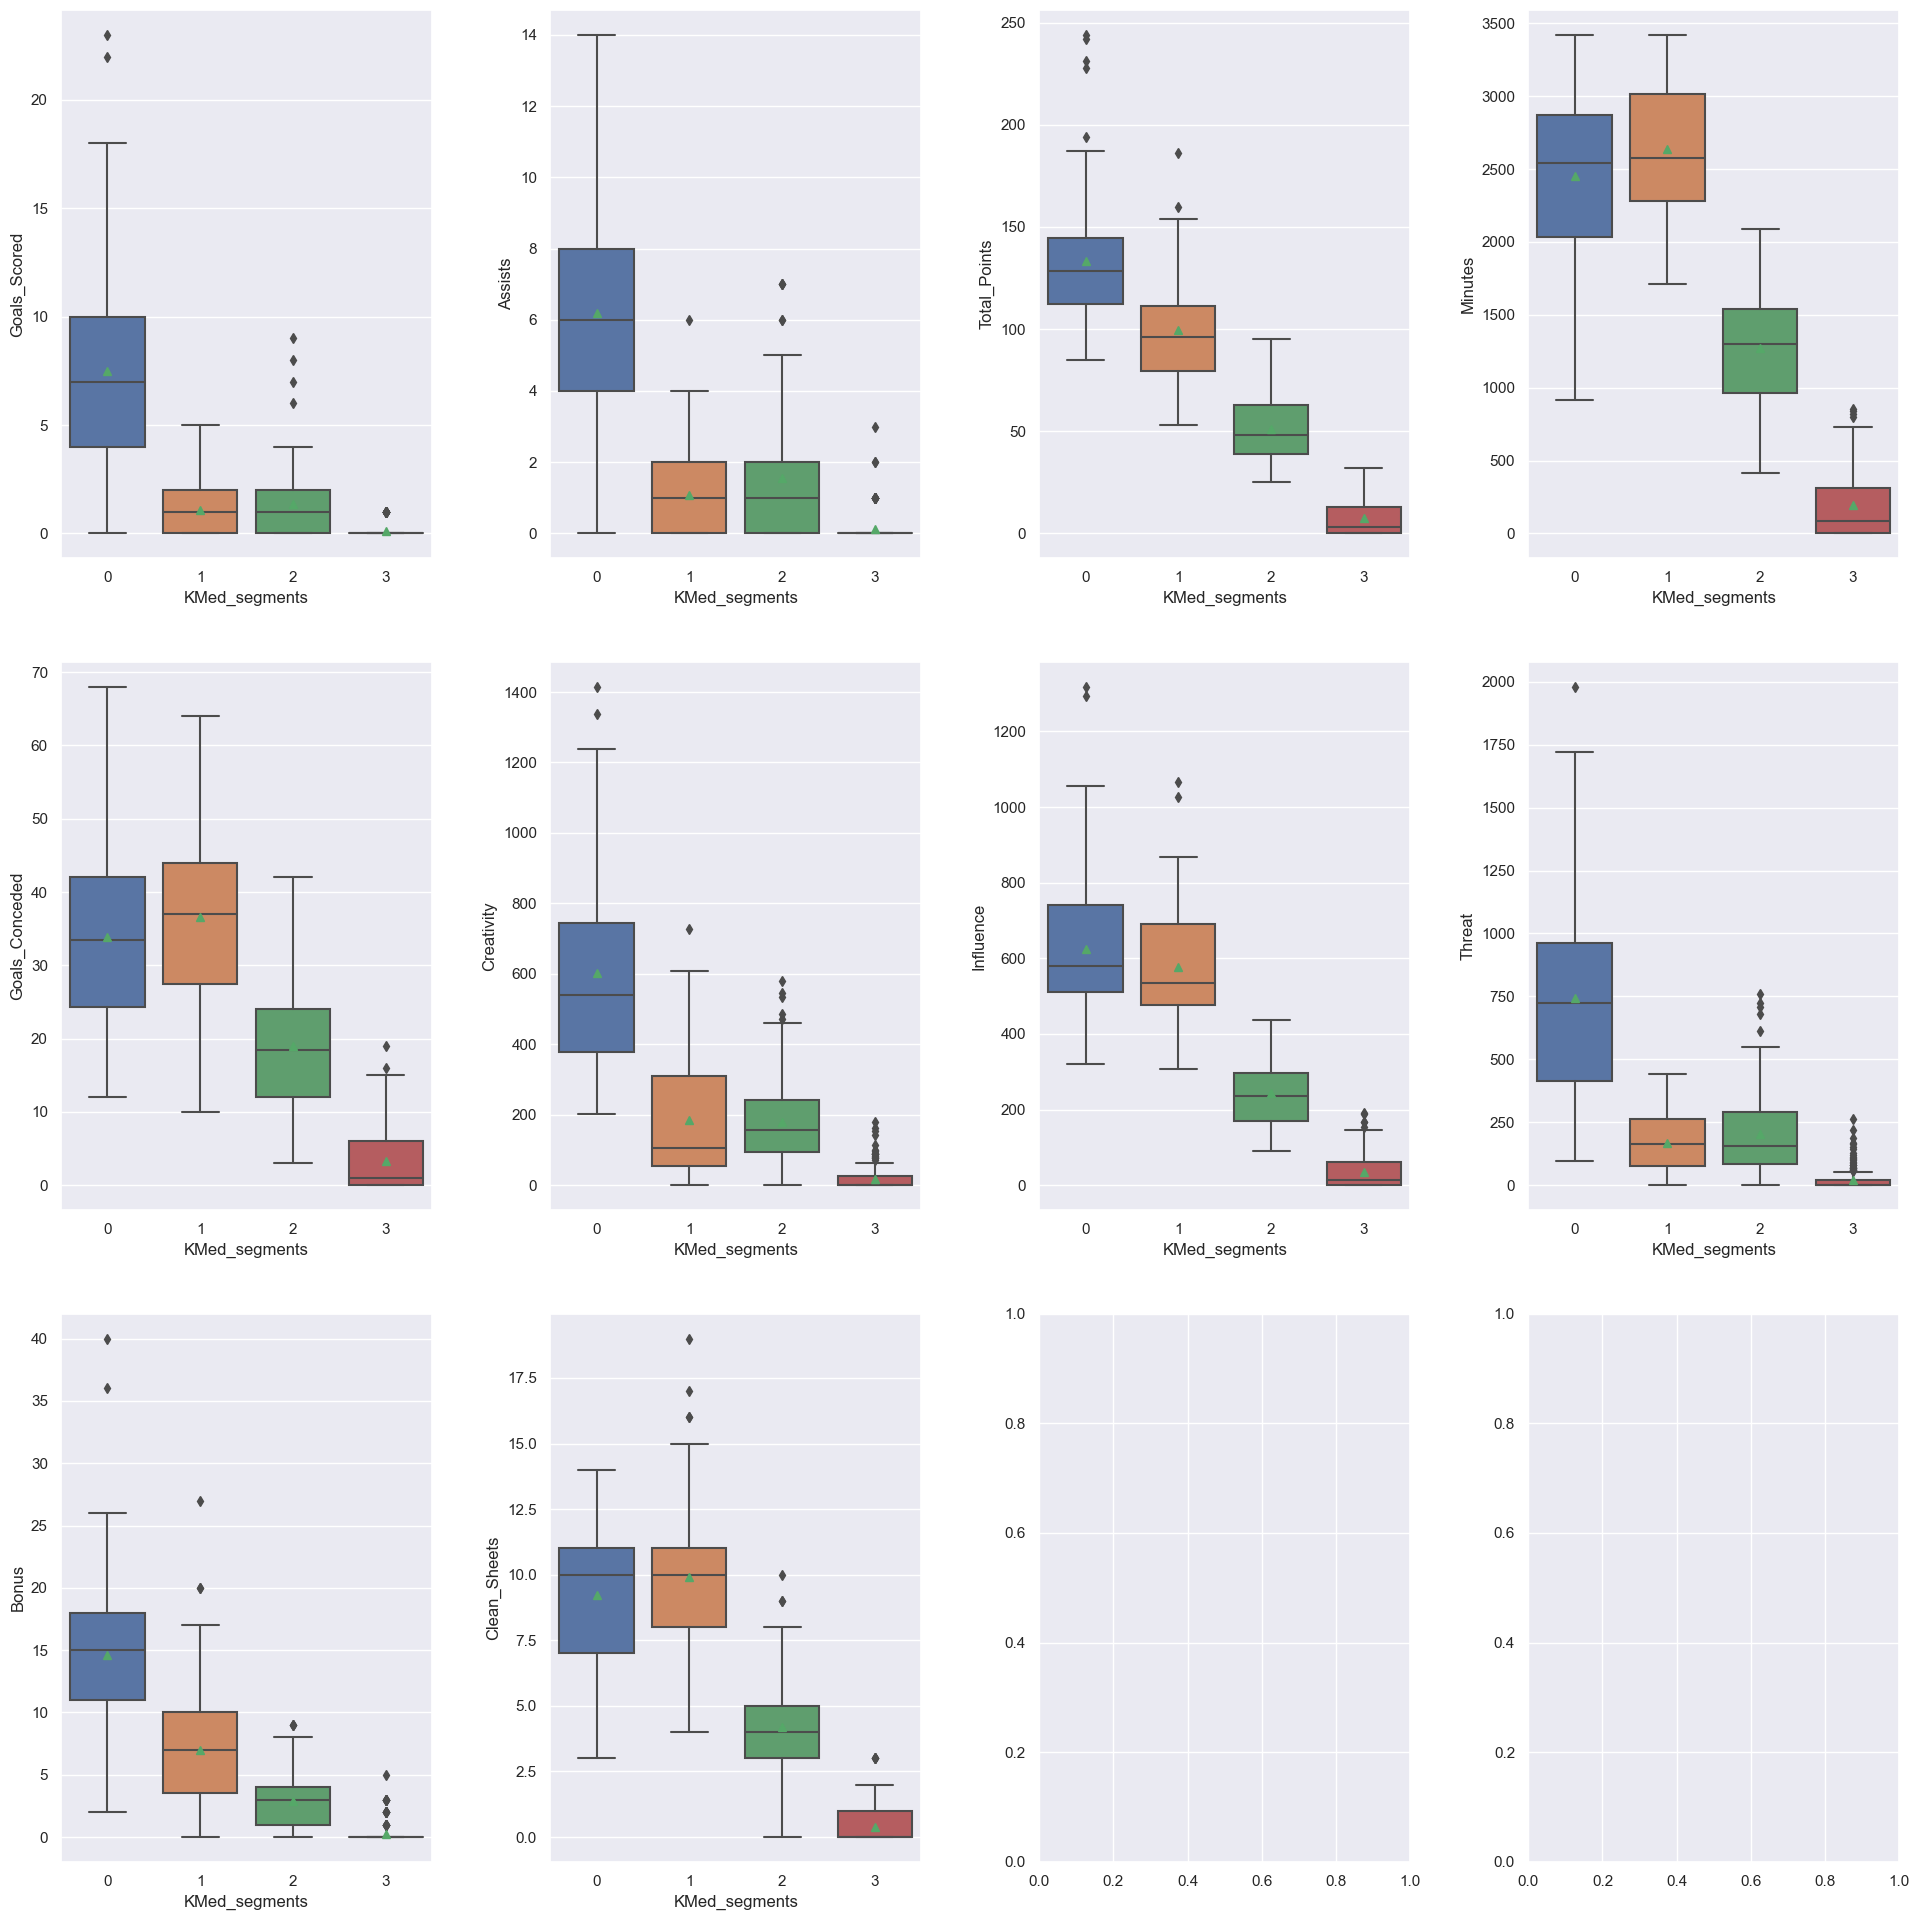

In [57]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df2,
                y = df2.columns[3 + counter],
                x = "KMed_segments", showmeans = True
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

 ### **Characteristics of each cluster**
- **Cluster 0: OUTSTANDING PLAYERS***
    - 82 players
    - High goals scored, High assists, high total fantasy points
    - Moderate game time, high creativity, influence, and threat score.
    - Most of the players got high bonus points. 
    - Moderate Clean Sheets.
    

- **Cluster 1: ABOVE AVERAGE PLAYERS**
    - 97 players
    - Few goals and assists, High total fantasy points scored in the prior season 
    - Moderate Creativity, High minutes played, High influence score, Less threat score
    - Most of the players got Moderate Bonus points.

- **Cluster 2: AVERAGE PLAYERS**
    - 136 players
    - Moderate goals scored, assists and total fantasy points
    - Low Creativity and influence scores, Moderate game time and threat scores.
    - Most of the players got few bonus points.


- **Cluster 3: STRUGGLING PLAYERS**
    - 171 players
    - Most players in this cluster have no goals and assists and did not score any fantasy points.
    - Lowest game time, creativity, influence, and threat scores.
    - Most of the players in this cluster had a low game time, and low creativity, influence, and threat scores.
    - Most of the players got no Bonus points

### **Comparison of cluster profiles from K-Means and K-Medoids**

- In both algorithms, the distribution of each cluster differs. K-Medoids exhibits more balanced cluster groups due to its reliance on the median, which is less susceptible to the influence of outliers.

- While the cluster number changes, the cluster profiles remain consistent across both algorithms.

##  **Hierarchical Clustering**

In [58]:
hc_df = data_pca.copy()

In [59]:
hc_df1 = hc_df.copy()

In [60]:
# List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# List of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df1, metric = dm, method = lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.8430175514228708.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7412041292261758.
Cophenetic correlation for Euclidean distance and average linkage is 0.8476499945585417.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.862458135106748.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8381223141111799.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8028394390632132.
Cophenetic correlation for Chebyshev distance and average linkage is 0.816706493130225.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8448497876639636.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8065008904132248.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6583135946489013.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7747800632434058.
Cophenetic corr

**Let's explore different linkage methods with Euclidean distance only.**

In [61]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df1, metric = "euclidean", method = lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.8430175514228708.
Cophenetic correlation for complete linkage is 0.7412041292261758.
Cophenetic correlation for average linkage is 0.8476499945585417.
Cophenetic correlation for centroid linkage is 0.8068296032280462.
Cophenetic correlation for ward linkage is 0.5777738445861549.
Cophenetic correlation for weighted linkage is 0.862458135106748.
****************************************************************************************************
Highest cophenetic correlation is 0.862458135106748, which is obtained with weighted linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance only.**

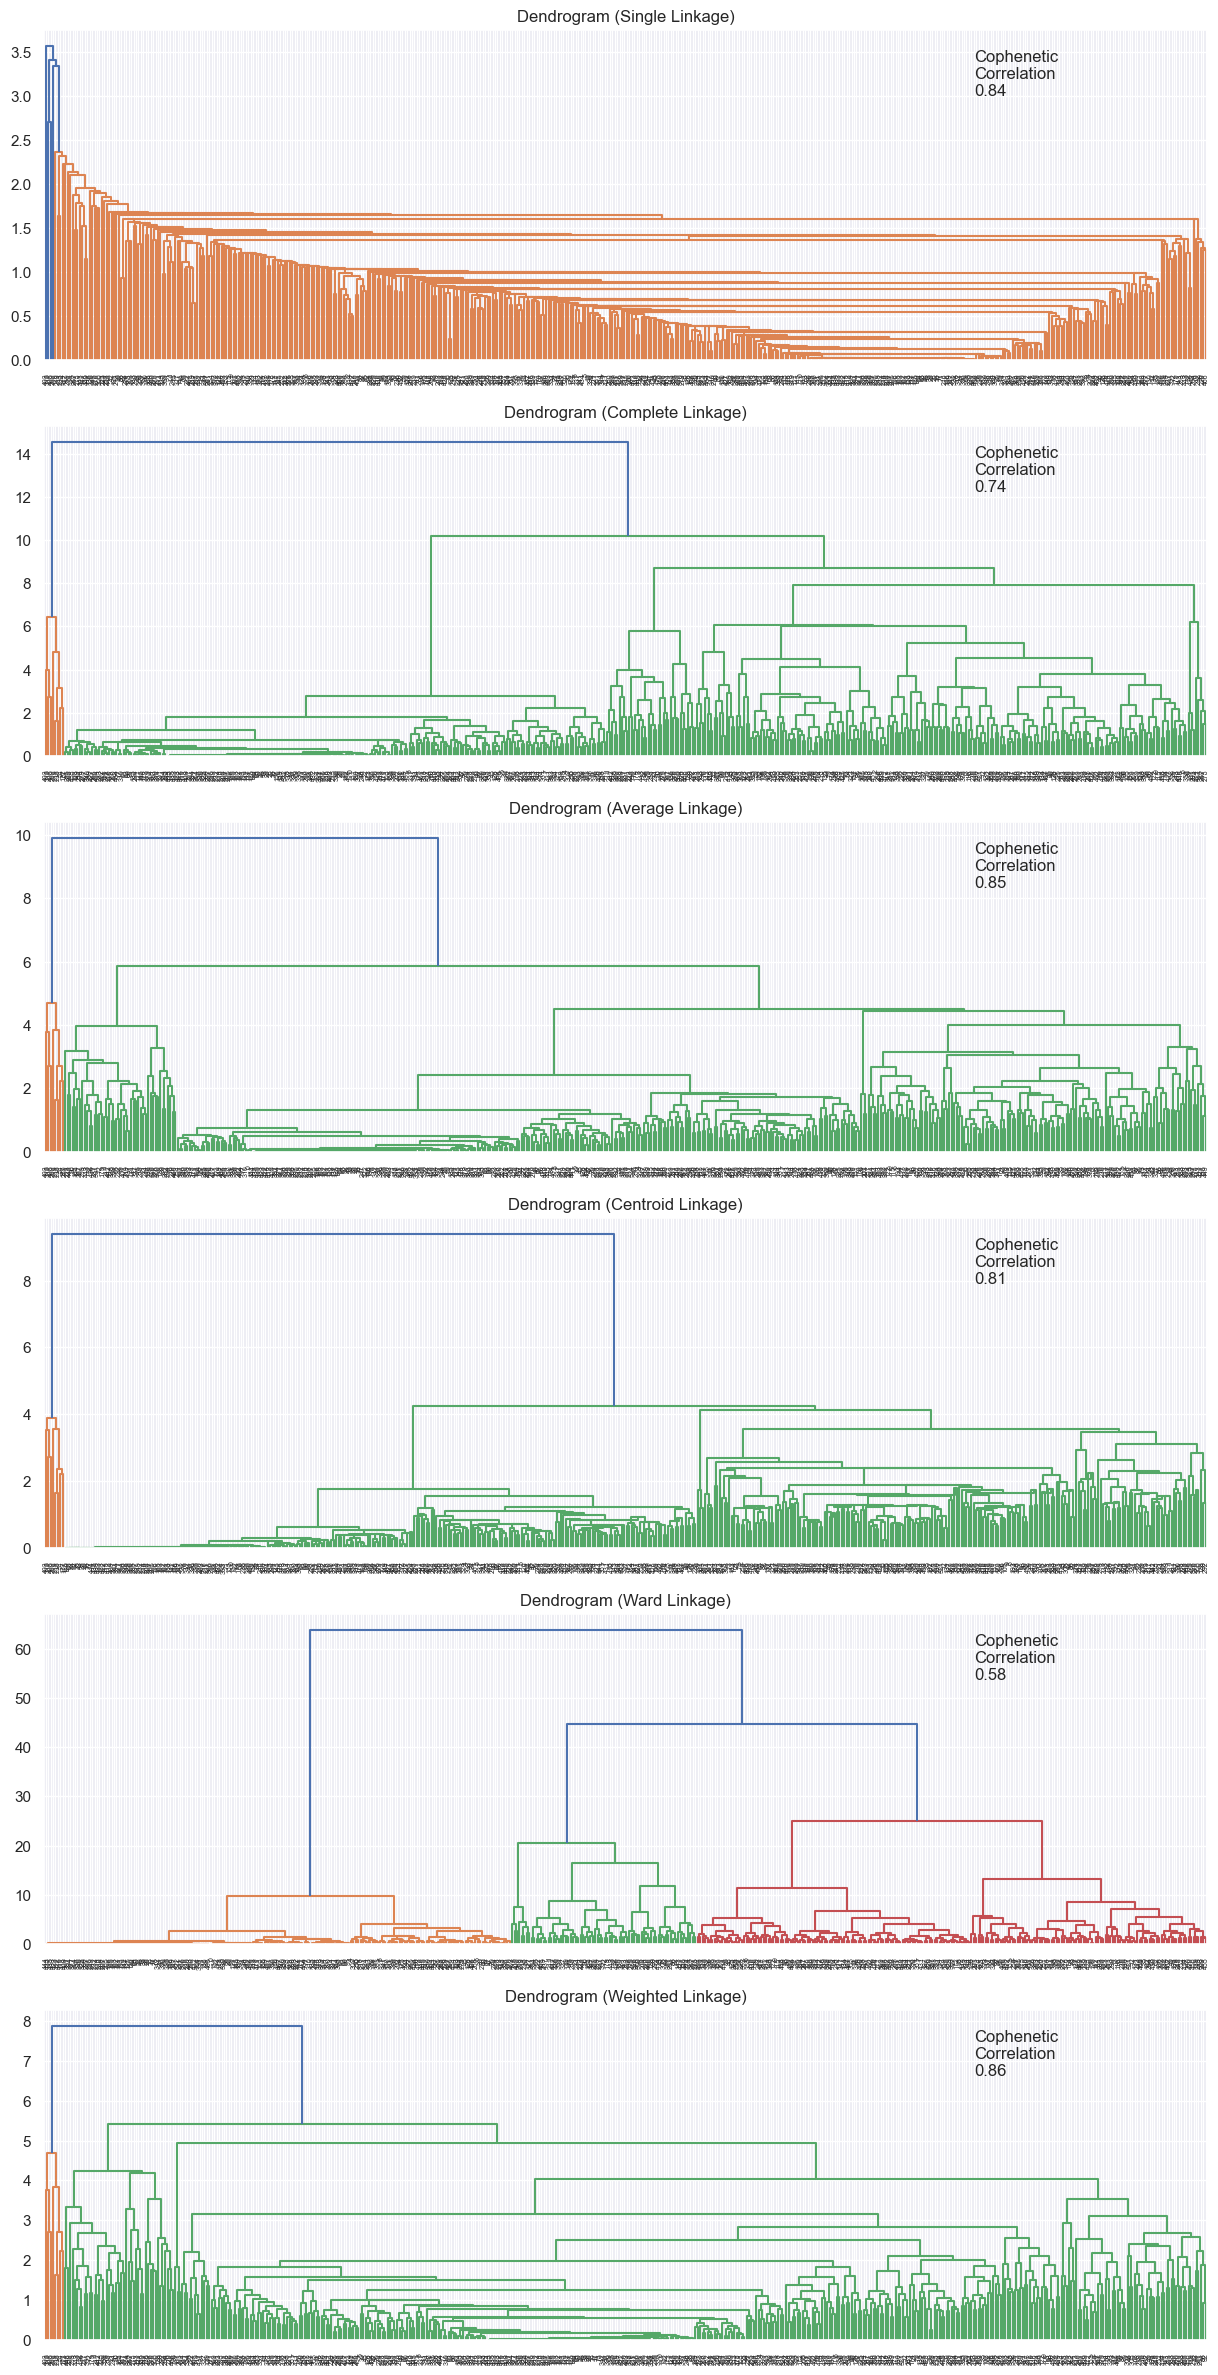

In [62]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize = (15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df1, metric = "euclidean", method = method)

    dendrogram(Z, ax = axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [63]:
# Let's compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns = compare_cols)
df_cc = df_cc.sort_values(by = "Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.577774
1,complete,0.741204
3,centroid,0.806830
0,single,0.843018
2,average,0.847650
5,weighted,0.862458


 ### **Observations**
- We will proceed with using 4 clusters, the Euclidean distance metric, and average linkage for our analysis, as the sklearn implementation does not provide support for weighted linkage.

In [64]:
HCmodel = AgglomerativeClustering(n_clusters = 4, metric = "euclidean", linkage = "average")
HCmodel.fit(hc_df1)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=4)

In [65]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the Heirarhical and original dataframes
hc_df["HC_segments_L1"] = HCmodel.labels_
df3["HC_segments_L1"] = HCmodel.labels_

### **Cluster Profiling**

In [66]:
hc_cluster_profile = df3.groupby("HC_segments_L1").mean(numeric_only = True) #mean

In [67]:
# Adding the count
hc_cluster_profile["count"] = (
    df3.groupby("HC_segments_L1")["Total_Points"].count().values
)

In [68]:
# Hierarchical clustering profile
hc_cluster_profile.style.highlight_max(color = "orange", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
HC_segments_L1,,,,,,,,,,,
0,0.881517,1.139810,47.969194,1205.945498,17.580569,148.574408,249.536967,131.753555,3.293839,4.182464,422
1,16.800000,9.200000,189.000000,3033.200000,44.000000,494.340000,860.720000,1591.600000,21.800000,10.800000,5
2,8.565217,5.826087,129.391304,2238.934783,29.760870,543.273913,586.234783,861.739130,14.021739,8.739130,46
3,19.333333,13.000000,238.000000,3101.000000,37.000000,1041.300000,1221.000000,1294.666667,34.000000,12.666667,3


In [69]:
# Players in each cluster
for cl in df3["HC_segments_L1"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df3[df3["HC_segments_L1"] == cl]["Player_Name"].unique())
    print()

In cluster 0, the following players are present:
['Alex Runnarsson' 'Bernd Leno' 'Calum Chambers' 'Cedric Soares'
 'Daniel Ceballos' 'David Luiz' 'Edward Nketiah' 'Emile Smith Rowe'
 'Gabriel Maghalaes' 'Gabriel Teodoro Martinelli Silva' 'Granit Xhaka'
 'Hector Bellerin' 'Kieran Tierney' 'Martin Odegaard' 'Matt Macey'
 'Miguel Azeez' 'Mohamed Naser El Sayed Elneny' 'Pablo Mari'
 'Reiss Nelson' 'Rob Holding' 'Sead Kolasinac' 'Shkodran Mustafi'
 'Sokratis Papastathopoulos' 'Thomas Partey' 'William Saliba'
 'Willian Borges Da Silva' 'Ahmed El Mohamady' 'Carney Chukwuemeka'
 'Conor Hourihane' 'Douglas Luiz Soares de Paulo' 'Emiliano Martinez'
 'Ezri Konsa Ngoyo' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'John McGinn' 'Jose Peleteiro Romallo'
 'Keinan Davis' 'Kortney Hause' 'Mahmoud Ahmed Ibrahim Hassan'
 'Marvelous Nakamba' 'Matt Targett' 'Matthew Cash' 'Morgan Sanson'
 'Orjan Nyland' 'Ross Barkley' 'Tyrone Mings' 'Wesley Moraes'
 'Aaron Connolly' 'Adam Lallana' 'Adam Webst

In [70]:
df3.groupby(["HC_segments_L1", "Position"])['Player_Name'].count()

HC_segments_L1  Position  
0               Defender      171
                Forward        43
                Goalkeeper     45
                Midfielder    163
1               Forward         4
                Midfielder      1
2               Defender        1
                Forward        16
                Midfielder     29
3               Forward         1
                Midfielder      2
Name: Player_Name, dtype: int64

**We see that most of the players have been grouped into one cluster, and there are two very sparse clusters. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be a good number of clusters from the dendrogram for Ward linkage.**

In [71]:
hc_df2 = data_pca.copy()

In [72]:
HCmodel = AgglomerativeClustering(n_clusters = 4, metric = "euclidean", linkage = "average")
HCmodel.fit(hc_df2)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=4)

In [73]:
df3 = df.copy()

# Adding hierarchical cluster labels to the Heirarhical and original dataframes
hc_df["HC_segments_L2"] =  HCmodel.labels_
df3["HC_segments_L2"] =  HCmodel.labels_

### **Cluster Profiling**

In [74]:
hc_cluster_profile = df3.groupby("HC_segments_L2").mean(numeric_only = True) #mean

In [75]:
# Adding the count
hc_cluster_profile["count"] = (
    df3.groupby("HC_segments_L2")["Total_Points"].count().values
)

In [76]:
# Hierarchical clustering profile
hc_cluster_profile.style.highlight_max(color = "orange", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count
HC_segments_L2,,,,,,,,,,,
0,0.881517,1.139810,47.969194,1205.945498,17.580569,148.574408,249.536967,131.753555,3.293839,4.182464,422
1,16.800000,9.200000,189.000000,3033.200000,44.000000,494.340000,860.720000,1591.600000,21.800000,10.800000,5
2,8.565217,5.826087,129.391304,2238.934783,29.760870,543.273913,586.234783,861.739130,14.021739,8.739130,46
3,19.333333,13.000000,238.000000,3101.000000,37.000000,1041.300000,1221.000000,1294.666667,34.000000,12.666667,3


In [77]:
#  Players in each cluster
for cl in df3["HC_segments_L2"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df3[df3["HC_segments_L2"] == cl]["Player_Name"].unique())
    print()

In cluster 0, the following players are present:
['Alex Runnarsson' 'Bernd Leno' 'Calum Chambers' 'Cedric Soares'
 'Daniel Ceballos' 'David Luiz' 'Edward Nketiah' 'Emile Smith Rowe'
 'Gabriel Maghalaes' 'Gabriel Teodoro Martinelli Silva' 'Granit Xhaka'
 'Hector Bellerin' 'Kieran Tierney' 'Martin Odegaard' 'Matt Macey'
 'Miguel Azeez' 'Mohamed Naser El Sayed Elneny' 'Pablo Mari'
 'Reiss Nelson' 'Rob Holding' 'Sead Kolasinac' 'Shkodran Mustafi'
 'Sokratis Papastathopoulos' 'Thomas Partey' 'William Saliba'
 'Willian Borges Da Silva' 'Ahmed El Mohamady' 'Carney Chukwuemeka'
 'Conor Hourihane' 'Douglas Luiz Soares de Paulo' 'Emiliano Martinez'
 'Ezri Konsa Ngoyo' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'John McGinn' 'Jose Peleteiro Romallo'
 'Keinan Davis' 'Kortney Hause' 'Mahmoud Ahmed Ibrahim Hassan'
 'Marvelous Nakamba' 'Matt Targett' 'Matthew Cash' 'Morgan Sanson'
 'Orjan Nyland' 'Ross Barkley' 'Tyrone Mings' 'Wesley Moraes'
 'Aaron Connolly' 'Adam Lallana' 'Adam Webst

In [78]:
df3.groupby(["HC_segments_L2", "Position"])['Player_Name'].count()

HC_segments_L2  Position  
0               Defender      171
                Forward        43
                Goalkeeper     45
                Midfielder    163
1               Forward         4
                Midfielder      1
2               Defender        1
                Forward        16
                Midfielder     29
3               Forward         1
                Midfielder      2
Name: Player_Name, dtype: int64

**Let's plot the boxplot**

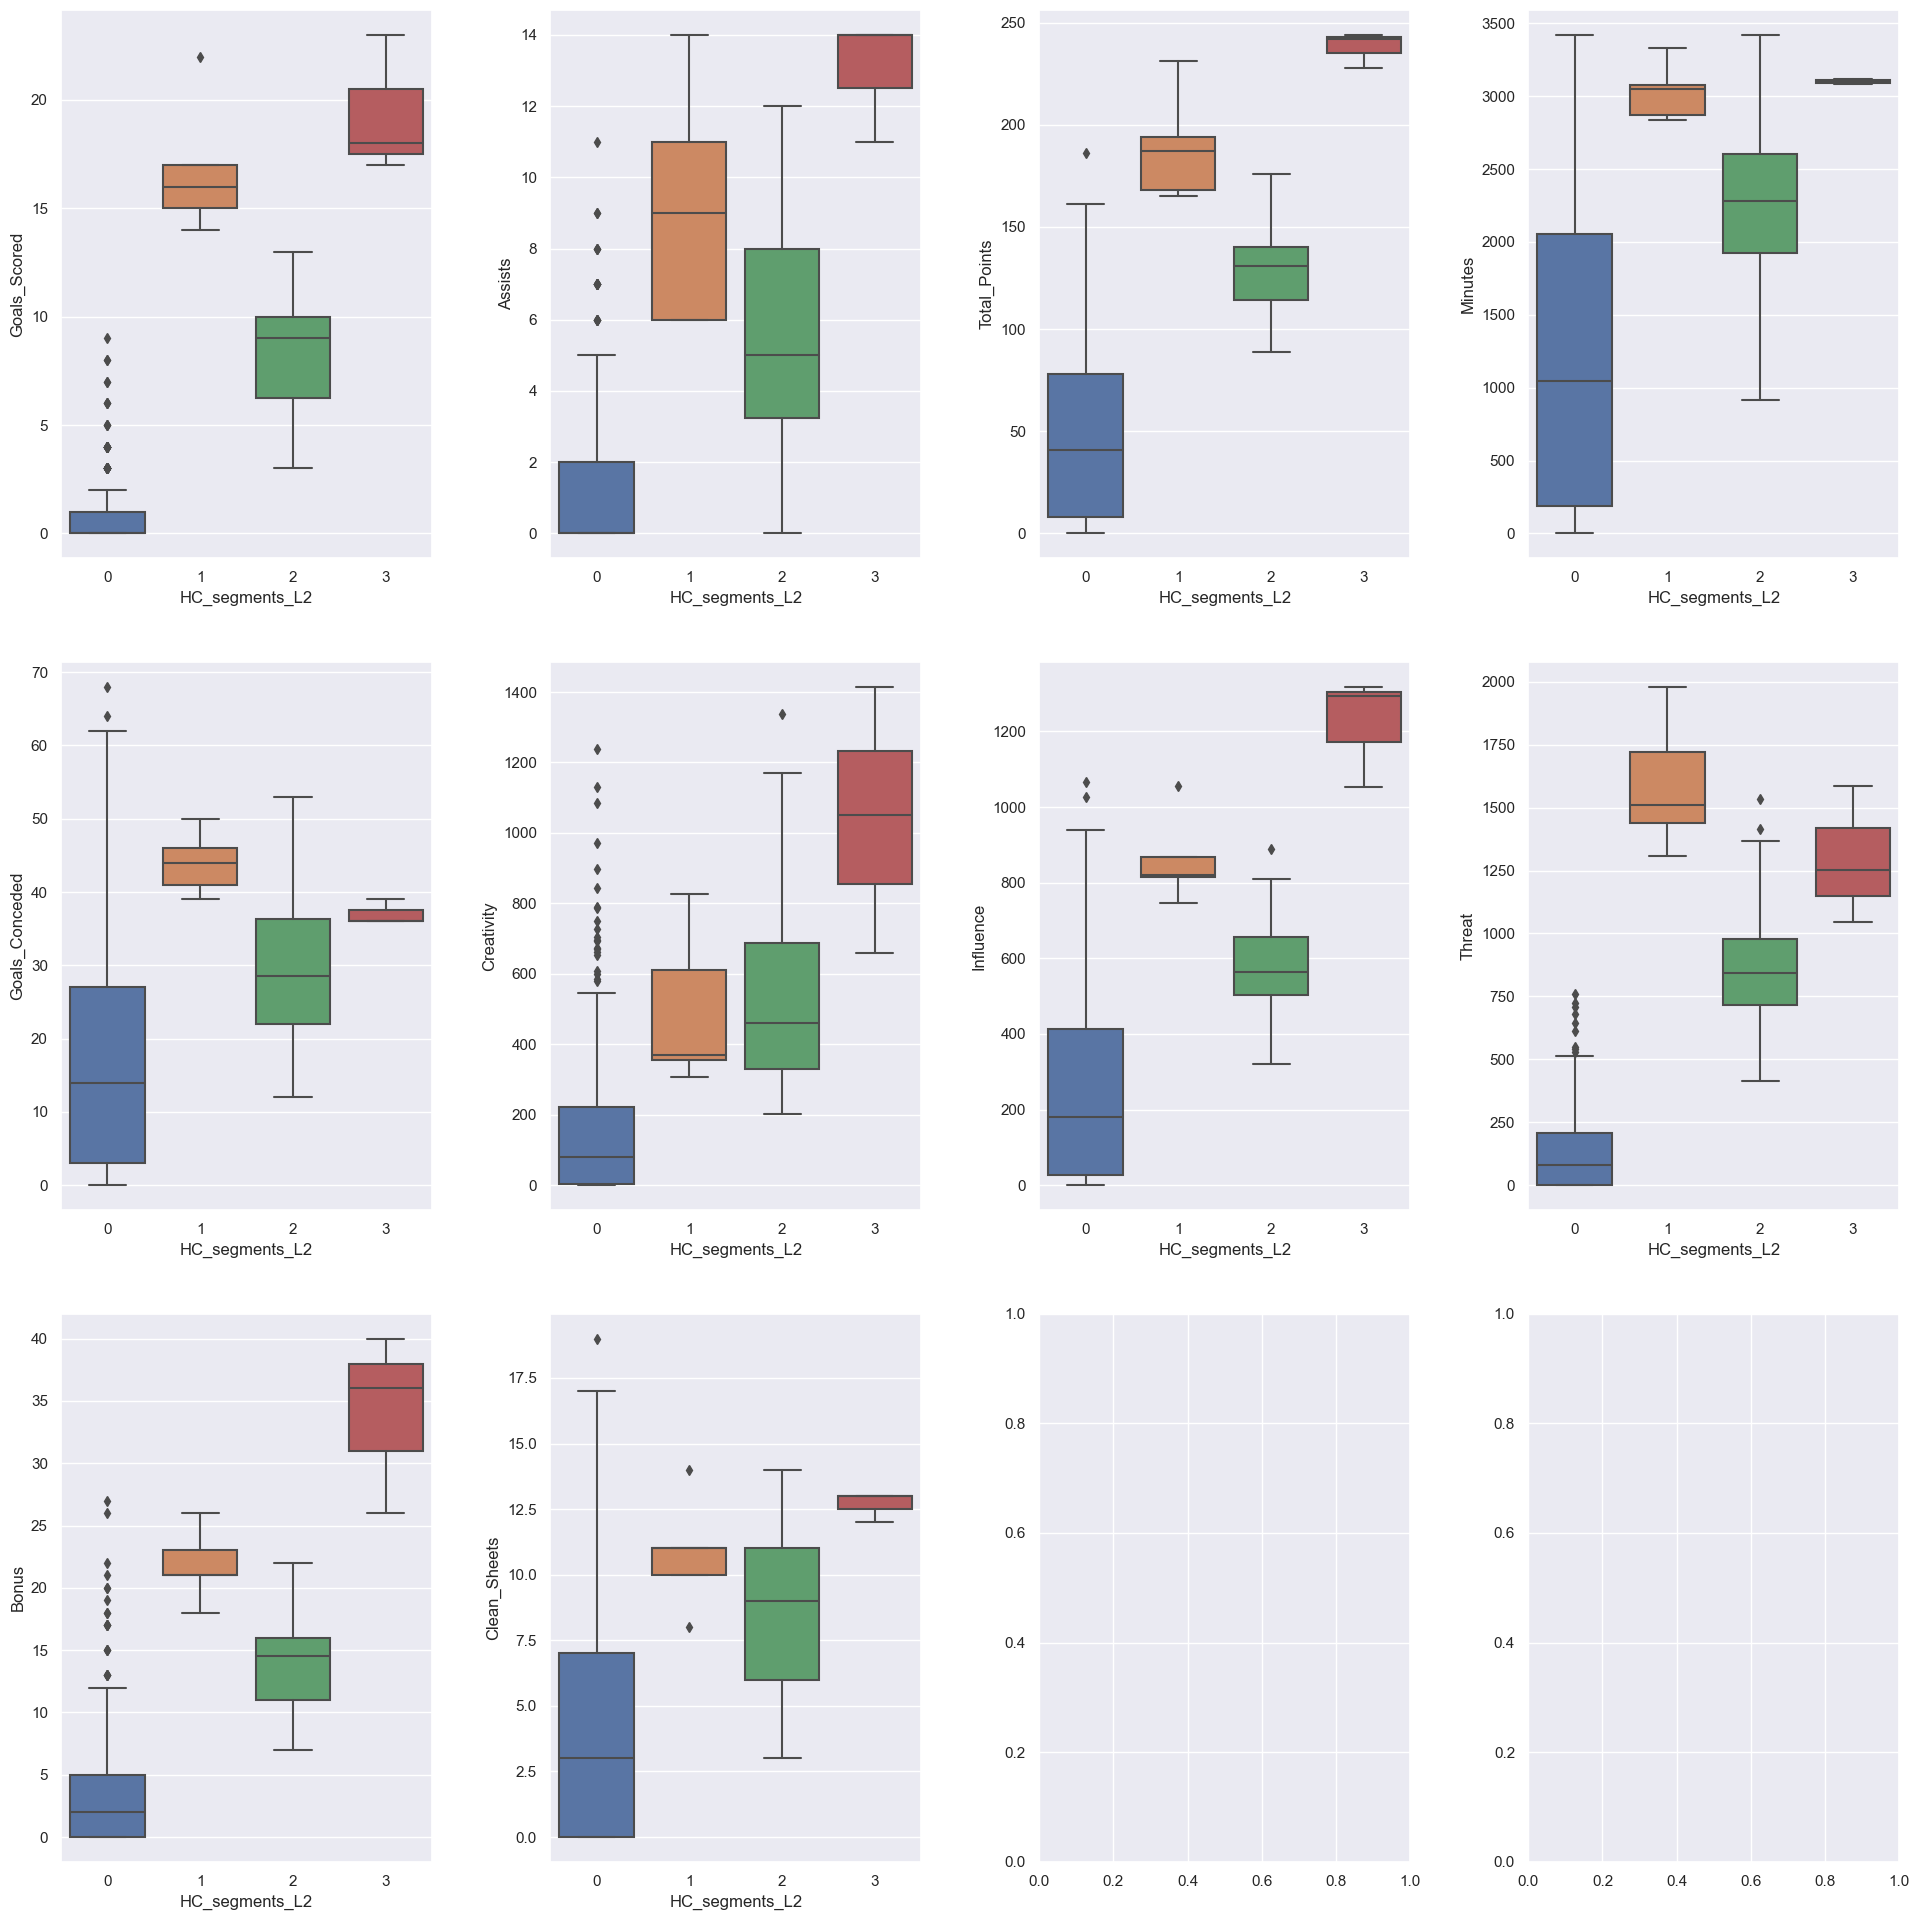

In [79]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df3,
                y = df3.columns[3 + counter],
                x = "HC_segments_L2",
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

### **Characteristics of each cluster:**

- **Cluster 0: STRUGGLING PLAYERS**
    - 422 players
    - No goalkeepers, so maybe players have more offensive duties in the team.
    - Most players in this cluster have no goals and only 1 assists. Few fantasy points scored in the previous season.
    - Lowest game time, creativity, influence, and threat scores.
    - Most of the players in this cluster had a low game time, and low creativity, influence, and threat scores.
    - Low Bonus points (~3)


- **Cluster 1: ABOVE AVERAGE PLAYERS**
    - 5 players
    - Moderate goals and assists and total fantasy points scored in the prior season 
    - Moderate Creativity, minutes played and influence score, High threat score
    - Most of the players got Moderate Bonus points.


- **Cluster 2: AVERAGE PLAYERS**
    - 46 players
    - No forwards, so maybe players have more defensive duties in the team.
    - Low goals scored, assists and total fantasy points scored in the prior season 
    - Moderate Creativity, Low minutes played, influence score, threat score
    - Most of the players got Few Bonus points.


- **Cluster 3: OUTSTANDING PLAYERS**
    - 3 players
    - High goals scored, assists and total fantasy points
    - High game time, creativity, influence, and Moderate threat score.
    - Most of the players got high bonus points. 
    - High Clean Sheets.

### **Comparison of cluster profiles from Hierarchical and previous algorithms:**

- There is a difference in the distribution of each cluster with the algorithms. Clusters in the Hierarchical algorithm are not evenly distributed, two clusters have extremely low players numbers, while one cluster contains most of the players. Therefore, it is unlikely that the Hierarchical algorithm provides a balanced representation of the players.

- While the cluster number changes, the cluster profiles remain consistent across both algorithms.

## **GMM clustering**

In [80]:
gmm_df = data_pca.copy()

In [81]:
gmm = GaussianMixture(n_components = 4, random_state = 1)  
gmm.fit(gmm_df) 

GaussianMixture(n_components=4, random_state=1)

### **Cluster Profiling**

In [82]:
df4 = df.copy()

# Adding gmm cluster labels to the GMM and original dataframes
gmm_df["GMM_segments"] = gmm.predict(gmm_df)
df4["GMM_segments"] = gmm.predict(data_pca)

In [83]:
gmm_cluster_profile = df4.groupby("GMM_segments").mean(numeric_only = True) #mean

In [84]:
# Cluster count
gmm_cluster_profile["count_in_each_segment"] = (
    df4.groupby("GMM_segments")["Total_Points"].count().values
)

In [85]:
# GMM clustering
gmm_cluster_profile.style.highlight_max(color = "orange", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
GMM_segments,,,,,,,,,,,
0,1.189655,1.344828,94.439655,2453.189655,33.793103,221.881897,535.862069,174.991379,6.793103,9.431034,116
1,0.000000,0.000000,3.547619,107.436508,2.055556,8.590476,15.739683,5.746032,0.000000,0.182540,126
2,6.552381,5.390476,114.876190,2104.809524,29.619048,501.710476,521.451429,683.466667,11.904762,7.685714,105
3,0.635659,0.868217,34.031008,908.968992,14.186047,106.855039,165.444961,110.813953,1.612403,2.596899,129


In [86]:
# Players in each cluster
for cl in df4["GMM_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df4[df4["GMM_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 1, the following players are present:
['Alex Runnarsson' 'Matt Macey' 'Miguel Azeez' 'Reiss Nelson'
 'Sead Kolasinac' 'Shkodran Mustafi' 'Sokratis Papastathopoulos'
 'William Saliba' 'Carney Chukwuemeka' 'Henri Lansbury'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Morgan Sanson'
 'Orjan Nyland' 'Wesley Moraes' 'Bernardo Fernandes da Silva Junior'
 'Davy Propper' 'Jason Steele' 'Jayson Molumby' 'Jose Izquierdo'
 'Reda Khadra' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Joel Mumbongo' 'Josh Benson' 'Lewis Richardson'
 'Phil Bardsley' 'Will Norris' 'Billy Gilmour'
 'Emerson Palmieri dos Santos' 'Faustino Anjorin' 'Fikayo Tomori'
 'Karlo Ziger' 'Valentino Livramento' 'Willy Caballero' 'Connor Wickham'
 'Jack Butland' 'James McCarthy' 'Mamadou Sakho' 'Martin Kelly'
 'Nathan Ferguson' 'Reece Hannam' 'Ryan Inniss' 'Sam Woods'
 'Stephen Henderson' 'Anthony Gordon' 'Cenk Tosun' 'Fabian Delph'
 'Joao Virginia' 'Jonjoe Kenny' 'Joshua King' 'Moise Kean'

**Let's plot the boxplot**

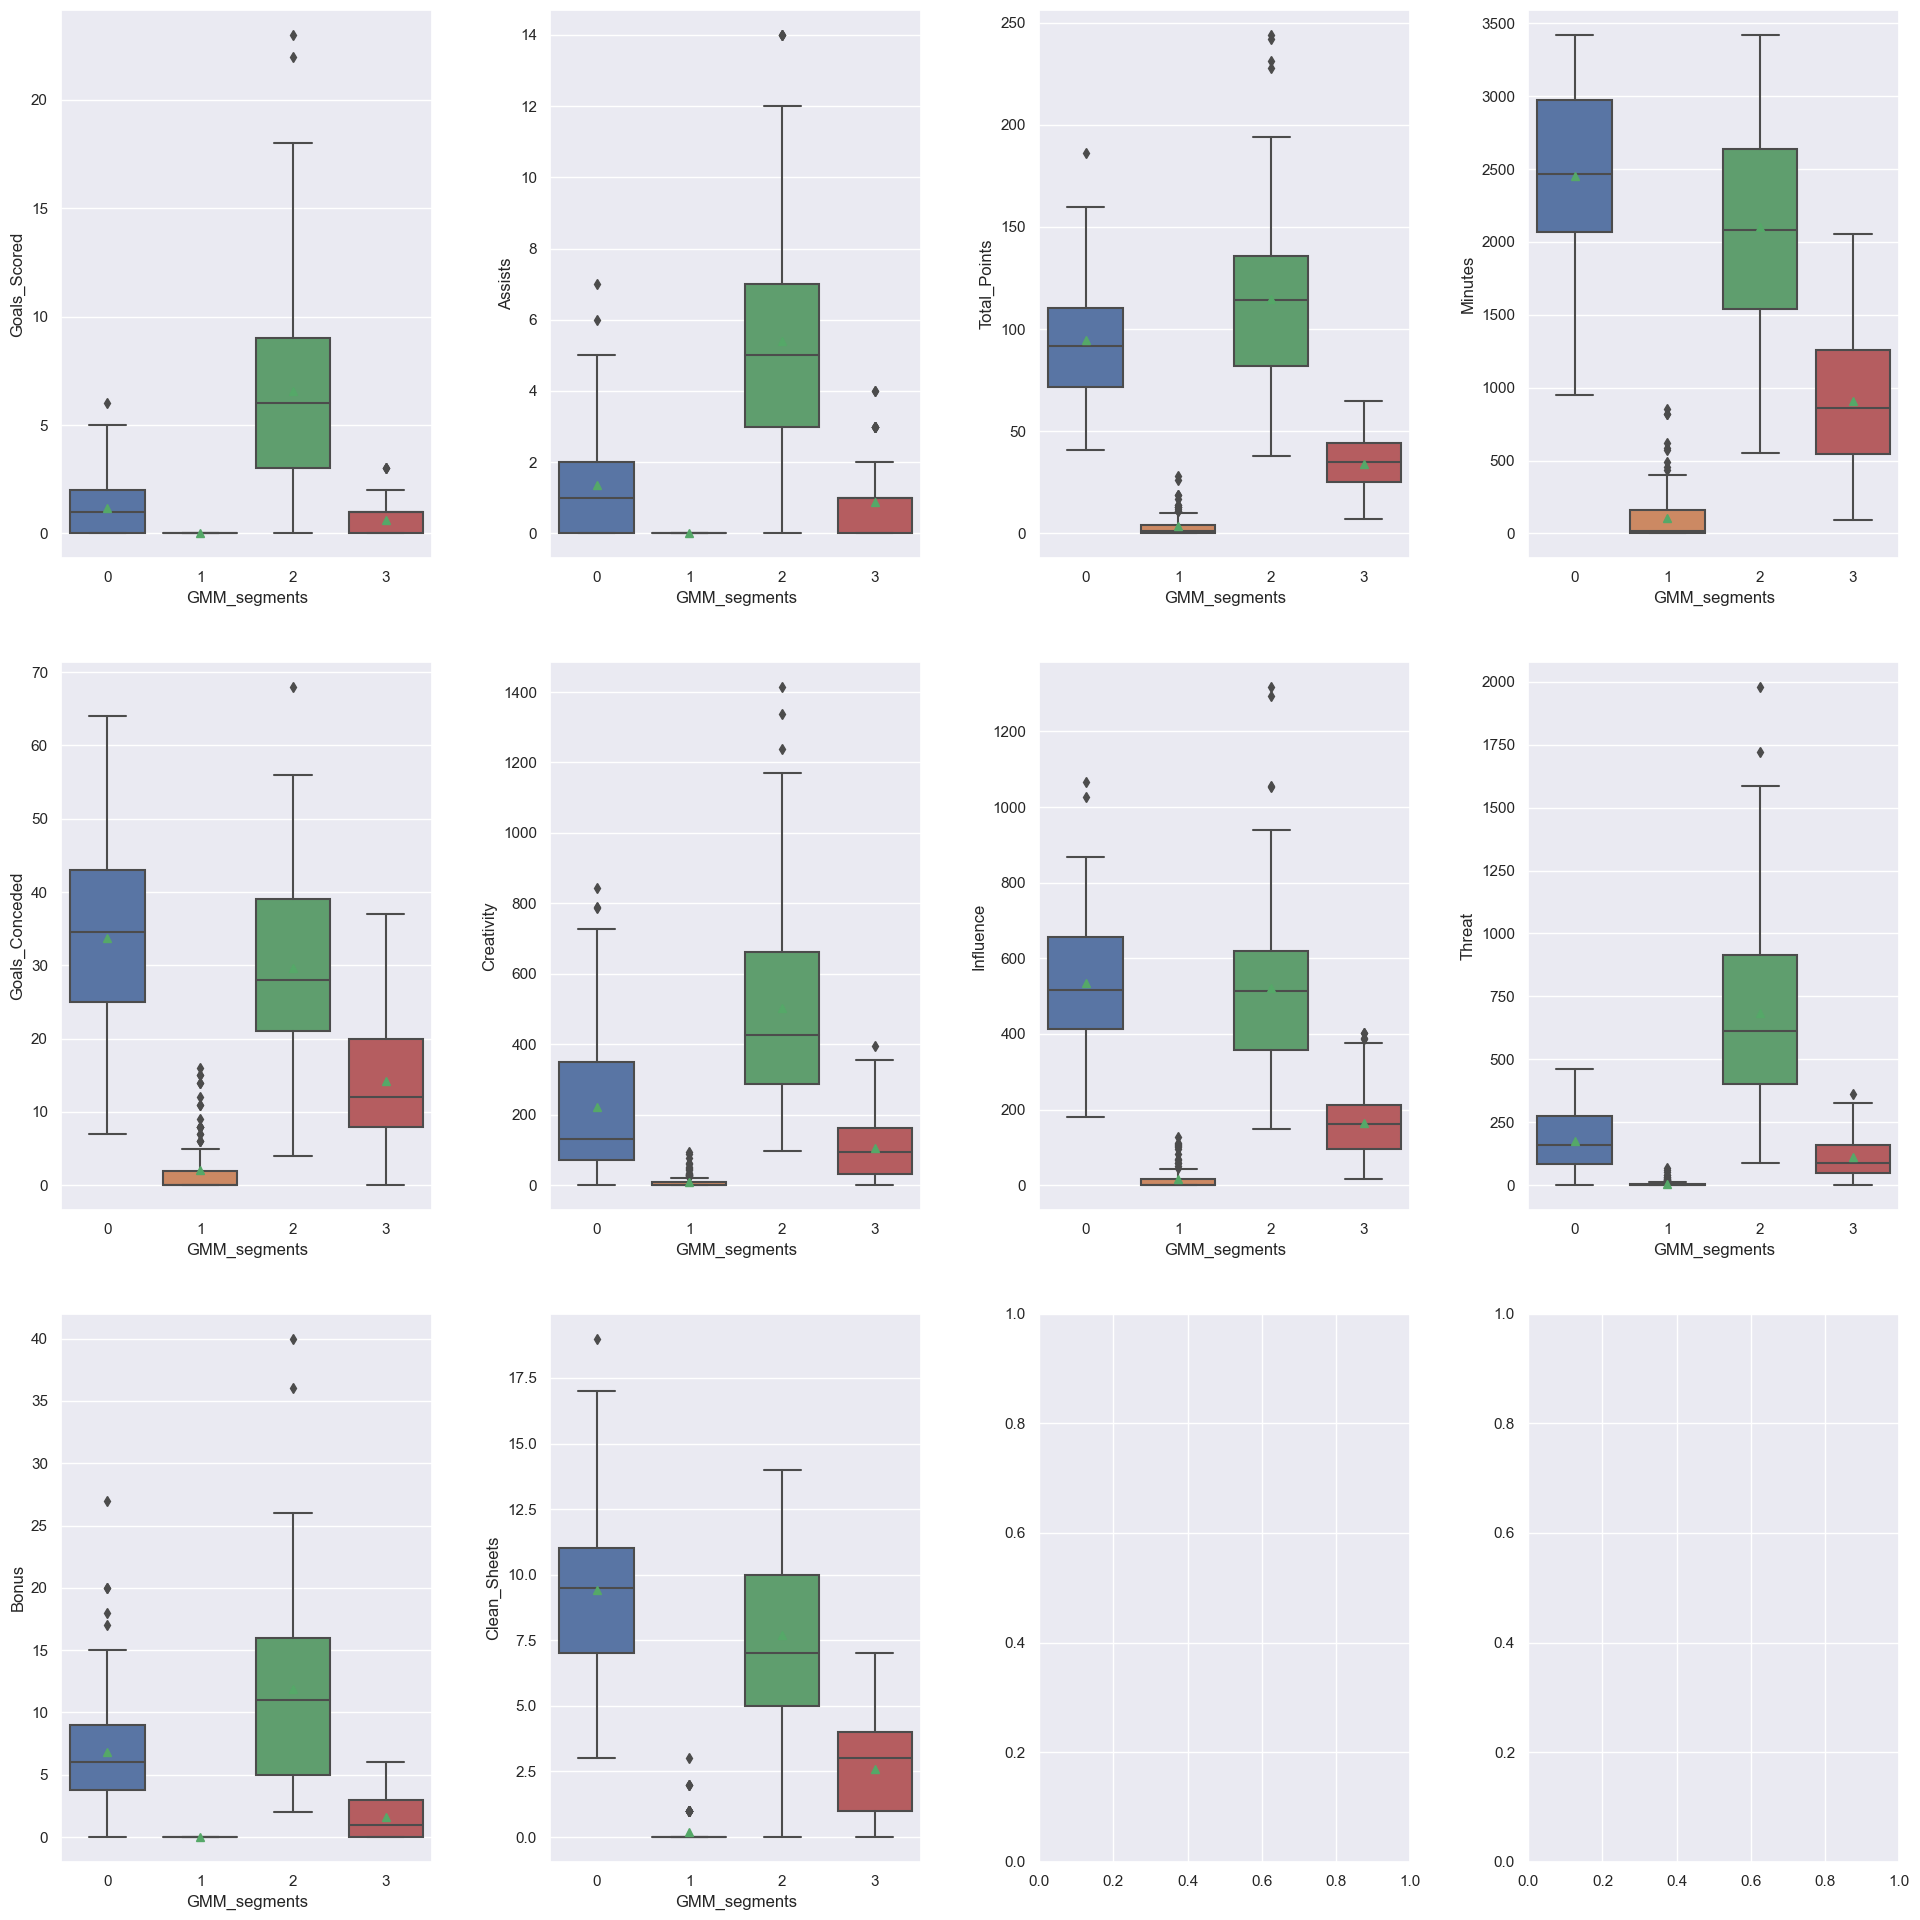

In [87]:
fig, axes = plt.subplots(3, 4, figsize = (20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df4,
                y = df4.columns[3 + counter],
                x = "GMM_segments",showmeans = True
            )
            counter = counter + 1

fig.tight_layout(pad = 3.0)

In [101]:
# GMM clustering
gmm_cluster_profile.style.highlight_max(color = "orange", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
GMM_segments,,,,,,,,,,,
0,1.189655,1.344828,94.439655,2453.189655,33.793103,221.881897,535.862069,174.991379,6.793103,9.431034,116
1,0.000000,0.000000,3.547619,107.436508,2.055556,8.590476,15.739683,5.746032,0.000000,0.182540,126
2,6.552381,5.390476,114.876190,2104.809524,29.619048,501.710476,521.451429,683.466667,11.904762,7.685714,105
3,0.635659,0.868217,34.031008,908.968992,14.186047,106.855039,165.444961,110.813953,1.612403,2.596899,129


### **Characteristics of each cluster**

- **Cluster 0: ABOVE AVERAGE PLAYERS**
    - 116 players
    - Moderate goals and assists and total fantasy points scored in the prior season 
    - Moderate Creativity and threat score, High minutes played and influence score
    - Most of the players got Moderate Bonus points.

- **Cluster 1: STRUGGLING PLAYERS**
    - 126 players
    - All players in this cluster have no goals and assists. Few fantasy points scored in the previous season.
    - Lowest game time, creativity, influence, and threat scores.
    - All players did not receive Bonus points

- **Cluster 2: OUTSTANDING PLAYERS**
    - 105 players
    - High goals scored, assists and total fantasy points
    - Moderate game time and influence, High creativity and threat score.
    - Most of the players got high bonus points. 

- **Cluster 3: AVERAGE PLAYERS**
    - 129 players
    - Few goals scored, assists and Low total fantasy points scored in the prior season 
    - Moderate minutes played, Low Creativity, influence and threat scores
    - Most of the players got Few Bonus points.

### **Comparison of cluster profiles from GMM and previous algorithms**

- There is a difference in the distribution of each cluster with the algorithms. Clusters in the GMM algorithm present a similar distribution as all of them cotain around amount of players.

- While the cluster number changes, the cluster profiles remain consistent across both algorithms.

## **DBSCAN**

In [88]:
dbscan_df = data_pca.copy()
dbscan_df1 = dbscan_df.copy()

In [89]:
# Initializing lists
eps_value = [2,3]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}  

In [90]:
# Finding the silhouette_score for each of the combination
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps = i, min_samples = j).fit(dbscan_df)          # Applying DBScan to each of the combinations in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(dbscan_df, labels)           # Finding silhouette score 
        print( 
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                            # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                       # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j              
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.5283008912823889
For eps value =2 For min sample =20 The average silhoutte_score is : 0.36478187516967564
For eps value =3 For min sample =6 The average silhoutte_score is : 0.624205189855851
For eps value =3 For min sample =20 The average silhoutte_score is : 0.6188492416303977


In [91]:
# Printing the highest silhouette score
print(
    "Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(
        high_silhouette_avg, high_i_j[0], high_i_j[1]
    )
)

Highest_silhoutte_avg is 0 for eps = 3 and min sample = 20


In [92]:
# Applying DBSCAN with the hyperparmeter values that we got
dbs = DBSCAN(eps = 3, min_samples = 20)

In [93]:
# Creating a copy of the original data
df5 = df.copy()

# Adding DBSCAN cluster labels to dbscan data
dbscan_df1["db_segments"] = dbs.fit_predict(dbscan_df1)

# Adding DBSCAN cluster labels to whole data
df5["db_segments"] =  dbs.fit_predict(dbscan_df)

### **Cluster Profiling**

In [94]:
db_cluster_profile = df5.groupby("db_segments").mean(numeric_only = True) #mean

In [95]:
# Cluster count
db_cluster_profile["count_in_each_segment"] = (
    df5.groupby("db_segments")["Total_Points"].count().values
)

In [96]:
# GMM clustering
db_cluster_profile.style.highlight_max(color = "orange", axis = 0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
db_segments,,,,,,,,,,,
-1,18.666667,11.666667,221.000000,3045.000000,41.000000,779.533333,1067.566667,1447.000000,28.666667,11.166667,6
0,1.693617,1.625532,56.442553,1315.104255,18.878723,188.526383,284.750213,209.361702,4.412766,4.663830,470


**Observations and Insights:**

- With eps = 3 and min_sample = 20, DBSCAN a very skewed result with only 2 clusters. Therefore, it does not represent accurately the dataset.  

### **Choosing the Best Algorithm**

- Since cluster profiles are the same for every algorithm except DBSCAN, it is difficult to choose the best algorithm. We can compute the silhouette score to choose the best algorithm among all the algorithms.

In [97]:
#KMEANS  with number of clusters as 4 and random_state=1

kmeans = KMeans(n_clusters = 4, random_state = 1, n_init = 'auto')        

preds = kmeans.fit_predict((data_pca))                   

score = silhouette_score(data_pca, preds)                

print(score)         

0.40411092686635736


In [98]:
#K-MEDOIDS with number of clusters as 4 and random_state=1

kmedoids = KMedoids(n_clusters = 4, random_state = 1)   

preds = kmedoids.fit_predict((data_pca))              

score = silhouette_score(data_pca, preds)              

print(score)   

0.3938224996935733


In [99]:
# Hierarchical Clustering with distance as Euclidean, linkage as ward with clusters = 4

HCmodel = AgglomerativeClustering(n_clusters = 4, metric = "euclidean", linkage = "ward",) 

preds = HCmodel.fit_predict(data_pca)  # Fitting on PCA data 

score = silhouette_score(data_pca, preds)     

print(score)   


0.3849709986025469


In [100]:
# Gussian Mixture algorithm with number of clusters as 4 and random_state = 1

gmm = GaussianMixture(n_components=4, random_state=1)   

preds = gmm.fit_predict((data_pca))

score = silhouette_score(data_pca, preds)

print(score)

0.28494644297302196


**Observations and Insights:**
- By evaluating the silhouette score, it becomes evident that the **K-Means algorithm achieves the highest score among the algorithms applied to the data.** Therefore, we could say that K-Means would be the preferred algorithm.

## **Conclusion:**

- Given the noticeable decline observed at K = 4 in the elbow plot, we opted to set K as 4 for our clustering analysis.
- Players who exert a more substantial impact on the game tend to participate in longer game durations and accumulate higher fantasy point scores.
- While we explored five different algorithms, we ultimately decided to employ the K-Means algorithm as our final choice, as it achieved the highest silhouette score of 0.40.
- Players with greater goal-scoring abilities, creativity, and influence can command higher selling prices.
 


## **Recommendations:**

- In **Cluster 0**, we find the fantasy top-tier players who consistently accumulate higher point totals and even have a strong chance of earning bonus points. To encourage strategic choices and prevent teams from overcrowding with such players due to budget constraints, their prices should be set at a premium level.

- **Cluster 1** consists of players who tend to have limited playing time, often coming in as substitutes, resulting in lower fantasy point yields. These players should be assigned lower price tags, making them attractive differential options.

- In **Cluster 2**, we identify players who play key roles in their team's performance but may not frequently score or assist, leading to lower fantasy point outputs compared to top-tier players. Their pricing should strike a balance between the above clusters, reflecting their value.

- **Cluster 3** encompasses players primarily serving as backup options in case of injuries to the starting ones. Their playing time and fantasy point production are minimal, justifying the lowest pricing among the four clusters.

- It is crucial to consider players' past-season performances as a benchmark when determining fantasy prices for the upcoming season.

- To optimize the fantasy pricing strategy, OnSports should conduct separate cluster analyses for each playing position, as player roles and contributions can vary significantly based on their positions. This approach will result in a more tailored and effective pricing strategy.